In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from scipy.stats import spearmanr, kendalltau, mannwhitneyu, wilcoxon, kruskal
from collections import Counter
from statsmodels.tsa.arima.model import ARIMA
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from statsmodels.tsa.seasonal import seasonal_decompose
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import Ridge




In [3]:
df = pd.read_csv('/Users/nglongvu1002/Desktop/btcNews_Data.csv')

In [4]:
len(df)

2146

In [5]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,12-07-2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,13-07-2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litigat...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,14-07-2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,15-07-2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take ...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,16-07-2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


In [6]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2146 non-null   object 
 1   top_0     2146 non-null   object 
 2   top_1     2119 non-null   object 
 3   top_2     2047 non-null   object 
 4   top_3     1849 non-null   object 
 5   top_4     1629 non-null   object 
 6   top_5     1382 non-null   object 
 7   top_6     1156 non-null   object 
 8   top_7     980 non-null    object 
 9   top_8     842 non-null    object 
 10  top_9     742 non-null    object 
 11  top_10    670 non-null    object 
 12  top_11    587 non-null    object 
 13  top_12    502 non-null    object 
 14  top_13    434 non-null    object 
 15  top_14    367 non-null    object 
 16  top_15    304 non-null    object 
 17  top_16    269 non-null    object 
 18  top_17    229 non-null    object 
 19  top_18    197 non-null    object 
 20  top_19    166 non-null    obje


## 1. Exploratory Data Analysis (EDA) on Numerical Data


### a. Visualize the historical price movements using line charts to identify trends.

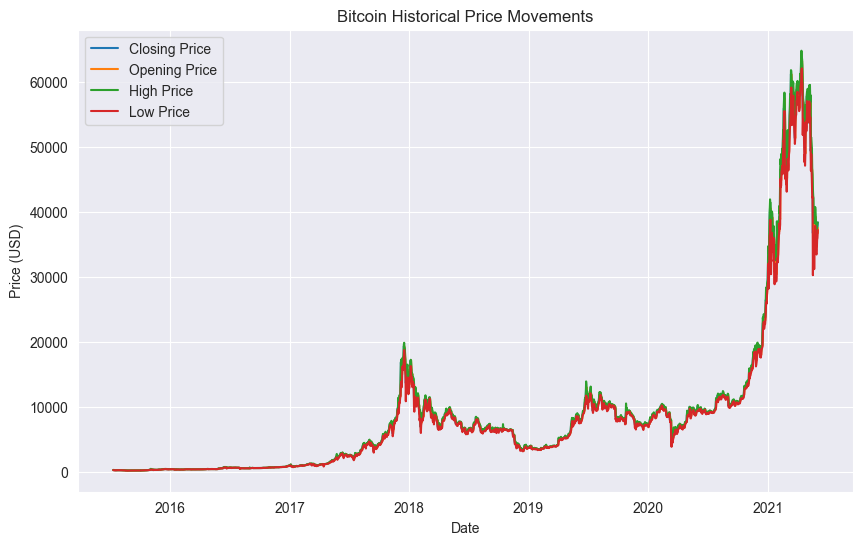

In [7]:
# Convert 'date' to datetime format for easier plotting
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Plot Bitcoin price movements
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Closing Price')
plt.plot(df['date'], df['open'], label='Opening Price')
plt.plot(df['date'], df['high'], label='High Price')
plt.plot(df['date'], df['low'], label='Low Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Historical Price Movements')
plt.legend()
plt.show()


In [8]:
price_summary = df[['price', 'open', 'high', 'low']].describe()
print(price_summary)

              price          open          high           low
count   2146.000000   2146.000000   2146.000000   2146.000000
mean    8649.910485   8632.001165   8896.109925   8336.822973
std    12071.304908  12055.215223  12454.354964  11588.466405
min      211.400000    211.400000    226.600000    196.300000
25%      896.000000    894.600000    914.700000    871.800000
50%     6394.950000   6391.000000   6528.800000   6278.900000
75%     9578.575000   9568.525000   9750.700000   9325.050000
max    63540.900000  63544.200000  64778.000000  62067.500000


In [9]:
# Identify Highest and Lowest Prices
max_price = df['price'].max()
max_price_date = df.loc[df['price'].idxmax(), 'date']
min_price = df['price'].min()
min_price_date = df.loc[df['price'].idxmin(), 'date']
print(f"Max Price: {max_price} on {max_price_date}")
print(f"Min Price: {min_price} on {min_price_date}")



Max Price: 63540.9 on 2021-04-13 00:00:00
Min Price: 211.4 on 2015-08-24 00:00:00


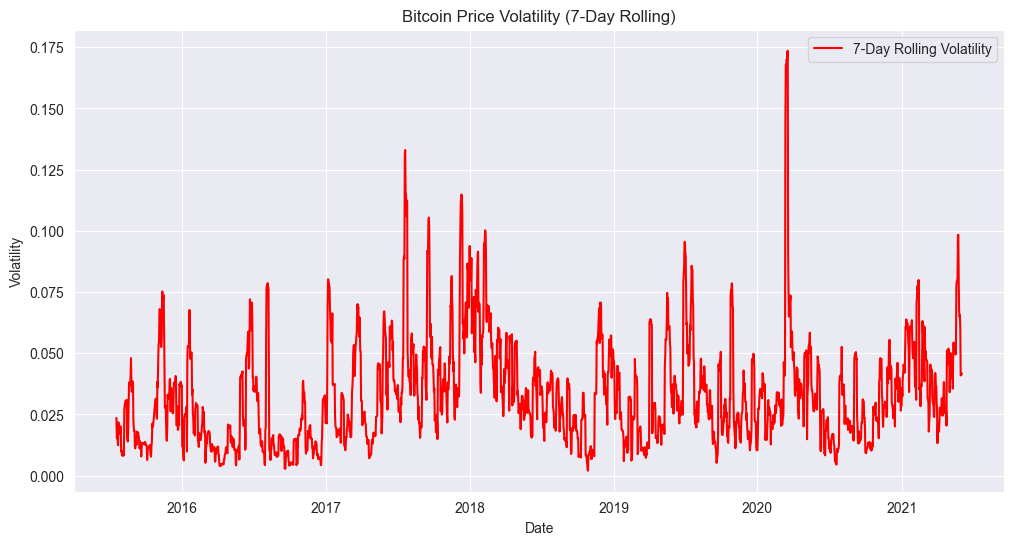

In [10]:
# Volatility Analysis (Daily Returns)
df['daily_return'] = df['price'].pct_change()
df['rolling_volatility'] = df['daily_return'].rolling(window=7).std()

# Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rolling_volatility'], label='7-Day Rolling Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Bitcoin Price Volatility (7-Day Rolling)')
plt.legend()
plt.show()

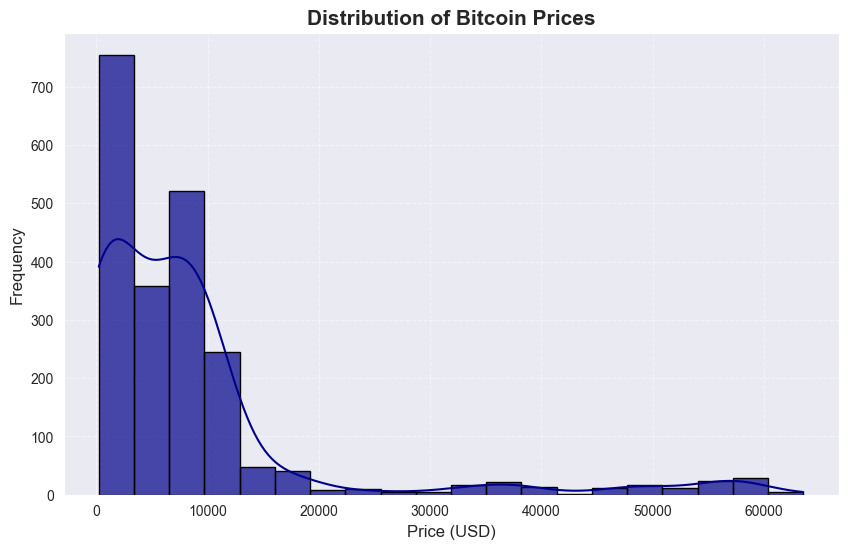

In [11]:
# Distribution Analysis with modified colors for better presentation
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='darkblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Bitcoin Prices', fontsize=15, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

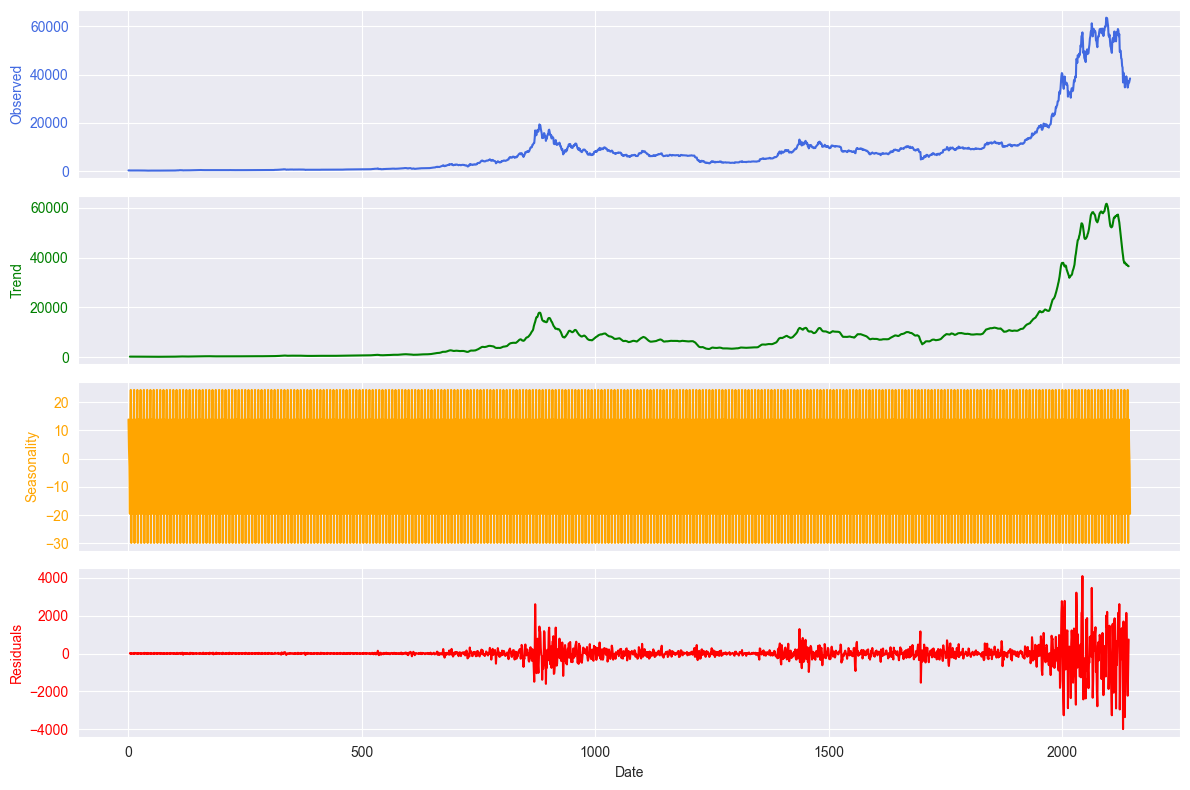

In [12]:
# Time-Series Decomposition
decomposition = seasonal_decompose(df['price'], model='additive', period=7)

# Plot the decomposition with updated colors for better presentation
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Observed with blue color
decomposition.observed.plot(ax=ax1, color='royalblue', legend=False)
ax1.set_ylabel('Observed', color='royalblue')
ax1.tick_params(axis='y', colors='royalblue')

# Trend with green color
decomposition.trend.plot(ax=ax2, color='green', legend=False)
ax2.set_ylabel('Trend', color='green')
ax2.tick_params(axis='y', colors='green')

# Seasonality with orange color
decomposition.seasonal.plot(ax=ax3, color='orange', legend=False)
ax3.set_ylabel('Seasonality', color='orange')
ax3.tick_params(axis='y', colors='orange')

# Residuals with red color
decomposition.resid.plot(ax=ax4, color='red', legend=False)
ax4.set_ylabel('Residuals', color='red')
ax4.tick_params(axis='y', colors='red')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


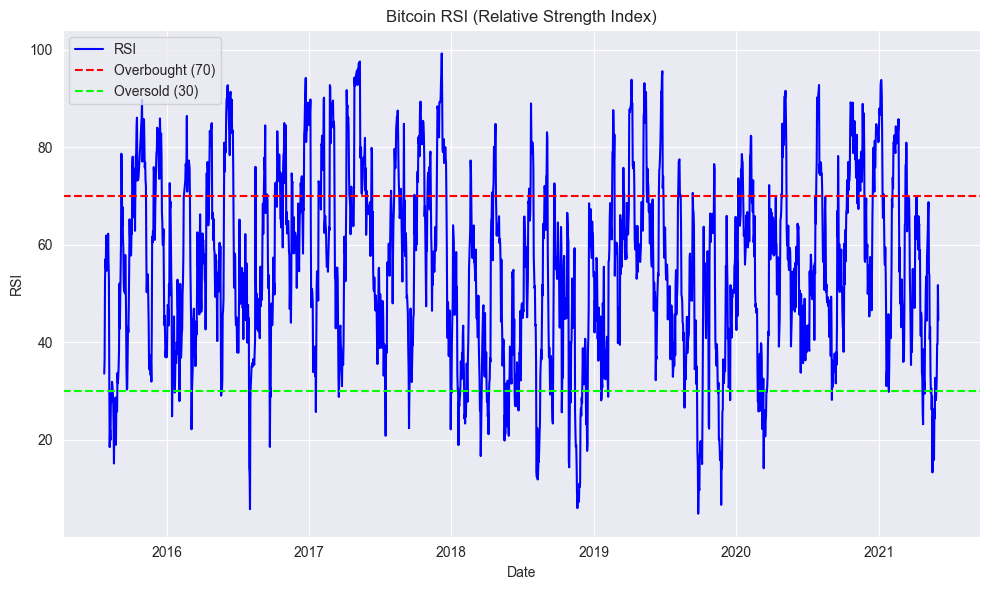

In [13]:
# Calculate RSI (Relative Strength Index)
delta = df['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI with updated colors for better presentation
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='lime', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Bitcoin RSI (Relative Strength Index)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
df

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_35,price,open,high,low,vol.,change %,daily_return,rolling_volatility,RSI
0,2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%,NaN,NaN,NaN
1,2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%,-0.064433,NaN,NaN
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%,-0.011708,NaN,NaN
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take ...,e coin bitcoin cards an interview with georgy...,...,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%,-0.012544,NaN,NaN
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%,-0.023994,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2021-05-30,after the installation of microbt whatsminers ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35652.8,34589.3,36388.6,33441.0,104.18K,3.09%,0.030887,0.060051,32.672860
2142,2021-05-31,brazil is one of the pioneers of cdbc s study ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37298.6,35644.0,37480.7,34213.2,131.70K,4.62%,0.046162,0.040909,39.543041
2143,2021-06-01,our maiden sto listing on the dbs digital ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36687.6,37294.3,37850.3,35742.7,113.48K,-1.64%,-0.016381,0.041124,39.586806
2144,2021-06-02,expanding cryptocurrency analysis to find and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37555.8,36687.7,38199.9,35981.1,96.89K,2.37%,0.023665,0.041237,51.704144


In [15]:
# Print the first few rows of the dataset to inspect 'price' column values
print(df.head())

# Check data types of the columns
print("\nData types in the DataFrame:\n", df.dtypes)

# Check unique values in 'price' column
print("\nUnique values in the 'price' column:\n", df['price'].unique())

# Check number of NaN and zero values in 'price' column
nan_count = df['price'].isna().sum()
zero_count = (df['price'] == 0).sum()

print(f"\nNumber of NaN values in 'price': {nan_count}")
print(f"Number of zero values in 'price': {zero_count}")

        date                                              top_0  \
0 2015-07-12  bitcoin the next logical step in the rise of u...   
1 2015-07-13  bitgive foundation announces new initiatives a...   
2 2015-07-14  keynote 2015  harnessing the distributed ledge...   
3 2015-07-15  patrick byrne says   will be able to replace w...   
4 2015-07-16  2015 q1 bitcoin investment trumps 2014 numbers...   

                                               top_1  \
0  the blockchain  towards crypto sovereignty    ...   
1  bitcoin in review  interesting trends in q1 of...   
2  cash back vs bitcoin  why bitcoin can be super...   
3  bitcoin based transparent marketplaces can pre...   
4  california wants to suspend uber in attempt to...   

                                               top_2  \
0  coinbase outage is a reminder to not store bit...   
1  cloudminr user accounts hacked  data sold for ...   
2  force or mathematics  fiat vs cryptocurrency  ...   
3  vladimir putin speaks out in favo

Sample 'vol.' values:
 0    120.70K
1    146.85K
2     60.62K
3     59.58K
4    121.32K
5     62.12K
6     55.34K
7     30.20K
8     46.60K
9     49.05K
Name: vol., dtype: object

Unique values in 'vol.' after conversion:
 [120700. 146850.  60620. ... 113480.  96890.  93870.]


/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/1608860211.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/1608860211.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume_category'] = pd.qcut(df['vol.'], q=num_bins, labels=bin_labels, duplicates='drop')
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/1608860211.py:29: SettingWithCopyWarning: 
A value is tryi

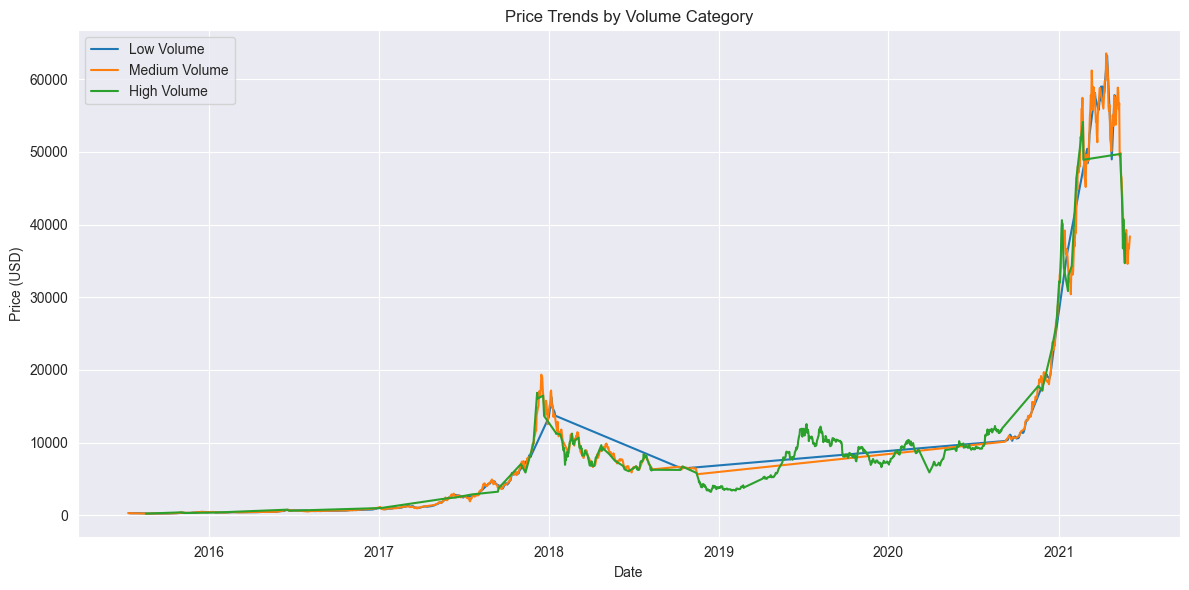

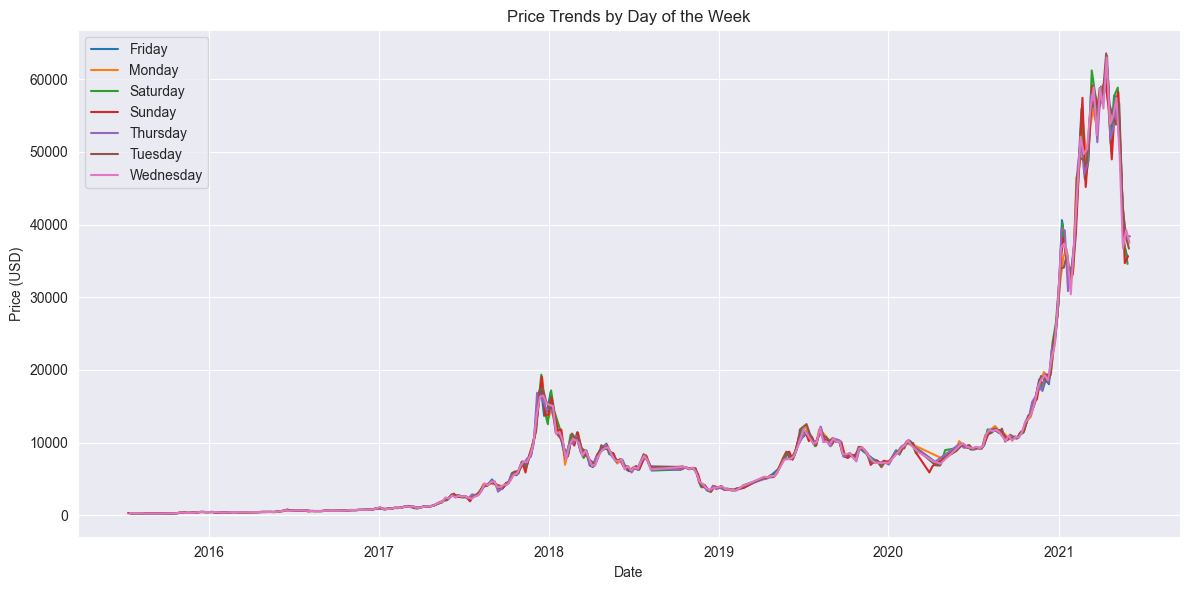

Volume Category Stats:
                          mean           std      max    min
volume_category                                            
Low               3690.914946  10323.449406  63216.0  222.7
Medium           13866.239137  16833.240064  63540.9  211.4
High              8915.053775   6188.951070  54111.8  226.0


In [16]:

# Inspect 'vol.' column for potential non-numeric characters
print("Sample 'vol.' values:\n", df['vol.'].head(10))

# Replace 'K' with '' and multiply by 1,000 (for thousands), handling other characters
df['vol.'] = df['vol.'].astype(str).str.replace('K', '', regex=False)

# Convert to numeric, coercing errors
df['vol.'] = pd.to_numeric(df['vol.'], errors='coerce') * 1000

# Drop rows with NaN in 'vol.' or 'price' after conversion
df = df.dropna(subset=['vol.', 'price'])

# Check if conversion worked and if 'vol.' has valid values
print("\nUnique values in 'vol.' after conversion:\n", df['vol.'].unique())

# Proceed only if 'vol.' has valid numeric values
if df['vol.'].notna().any():
    # Set 'date' as the index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True, drop=False)

    # Calculate tertiles for volume and classify days
    volume_bins = pd.qcut(df['vol.'], 3, labels=['Low', 'Medium', 'High'], duplicates='drop')
    num_bins = volume_bins.nunique()
    bin_labels = ['Low', 'Medium', 'High'][:num_bins]
    df['volume_category'] = pd.qcut(df['vol.'], q=num_bins, labels=bin_labels, duplicates='drop')

    # Add day of the week
    df['day_of_week'] = df.index.day_name()

    # Group by volume category and calculate statistics
    volume_stats = df.groupby('volume_category')['price'].agg(['mean', 'std', 'max', 'min'])

    # Plot: Price trends by volume category
    plt.figure(figsize=(12, 6))
    for category, group in df.groupby('volume_category'):
        plt.plot(group.index, group['price'], label=f"{category} Volume")
    plt.title('Price Trends by Volume Category')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Price trends by day of the week
    plt.figure(figsize=(12, 6))
    for day, group in df.groupby('day_of_week'):
        plt.plot(group.index, group['price'], label=f"{day}")
    plt.title('Price Trends by Day of the Week')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the calculated statistics
    print("Volume Category Stats:\n", volume_stats)
else:
    print("No valid 'vol.' values after conversion.")





1. Volume Impact on Price Movement: 
* Low Volume: with low trading volume, Bitcoin prices tend to be more stable and lower in value. This is typical in many asset classes when low liquidity lead to fewer significant price movement
* Medium Volume: Moderate level of trading activity might coincide with speculative trading or significant impacting prices
* High Volume: Less extreme price compared to medium but hight prices than low volume days. High volume can stabilize price fluctuations, supports higher price level, increased buyer interest. 

2. Weekly Price Change
* Weekends: Slight lower variability in prices compared to weekdays, since reduced trading activity as many financial instituations traders are not active
* Weekdays: Tuesday has the highest average price, since the closure of markets over the weekend

### b. Compute the parametric measures

In [17]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove any commas
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif '%' in value:  # If it's a percentage
            return float(value.replace('%', ''))  # You can handle percentages differently if needed
        else:
            return float(value)  # Direct conversion for regular numbers
    return float(value)  # In case it's already a float

# Apply the function to the 'change %' and other relevant columns
df['change %'] = df['change %'].astype(str).apply(convert_to_float)
df['price'] = df['price'].astype(str).apply(convert_to_float)  # Replace 'price' with the actual column name
df['open'] = df['open'].astype(str).apply(convert_to_float)  # And other columns as necessary
df['high'] = df['high'].astype(str).apply(convert_to_float)
df['low'] = df['low'].astype(str).apply(convert_to_float)
df['vol.'] = df['vol.'].astype(str).apply(convert_to_float)

# Now calculate parametric measures
numerical_cols = ['price', 'open', 'high', 'low', 'vol.', 'change %']

# Calculate the parametric measures
parametric_measures = df[numerical_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])

print(parametric_measures)



               price          open          high           low          vol.  \
mean    8.824069e+03  8.805952e+03  9.072041e+03  8.505307e+03  2.425531e+05   
median  6.147500e+03  6.147700e+03  6.267700e+03  5.889300e+03  1.273500e+05   
std     1.264387e+04  1.262652e+04  1.304436e+04  1.213850e+04  2.498212e+05   
var     1.598674e+08  1.594289e+08  1.701554e+08  1.473432e+08  6.241062e+10   
min     2.114000e+02  2.114000e+02  2.266000e+02  1.963000e+02  2.400000e+03   
max     6.354090e+04  6.354420e+04  6.477800e+04  6.206750e+04  9.995300e+05   

         change %  
mean     0.284263  
median   0.200000  
std      3.792860  
var     14.385787  
min    -17.050000  
max     25.560000  


/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/2123711424.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change %'] = df['change %'].astype(str).apply(convert_to_float)
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/2123711424.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(str).apply(convert_to_float)  # Replace 'price' with the actual column name
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/2123711424.py:1

| Measure      | Price       | Open        | High        | Low         | Volume      | Change %    |
|--------------|-------------|-------------|-------------|-------------|-------------|-------------|
| **Mean**     | 8,824.07    | 8,805.95    | 9,072.04    | 8,505.31    | 242,553     | 0.28%       |
| **Median**   | 6,147.50    | 6,147.70    | 6,267.70    | 5,889.30    | 127,350     | 0.20%       |
| **Std**      | 12,643.87   | 12,626.52   | 13,044.36   | 12,138.50   | 249,821.20  | 3.79%       |
| **Variance** | 159,867,400 | 159,428,900 | 170,155,400 | 147,343,200 | 62,410,620,000 | 14.39      |
| **Min**      | 211.40      | 211.40      | 226.60      | 196.30      | 2,400       | -17.05%     |
| **Max**      | 63,540.90   | 63,544.20   | 64,778.00   | 62,067.50   | 999,530     | 25.56%      |


### c. Compute the non-parametric measures

Median values:
price         6147.5
open          6147.7
high          6267.7
low           5889.3
vol.        127350.0
change %         0.2
dtype: float64


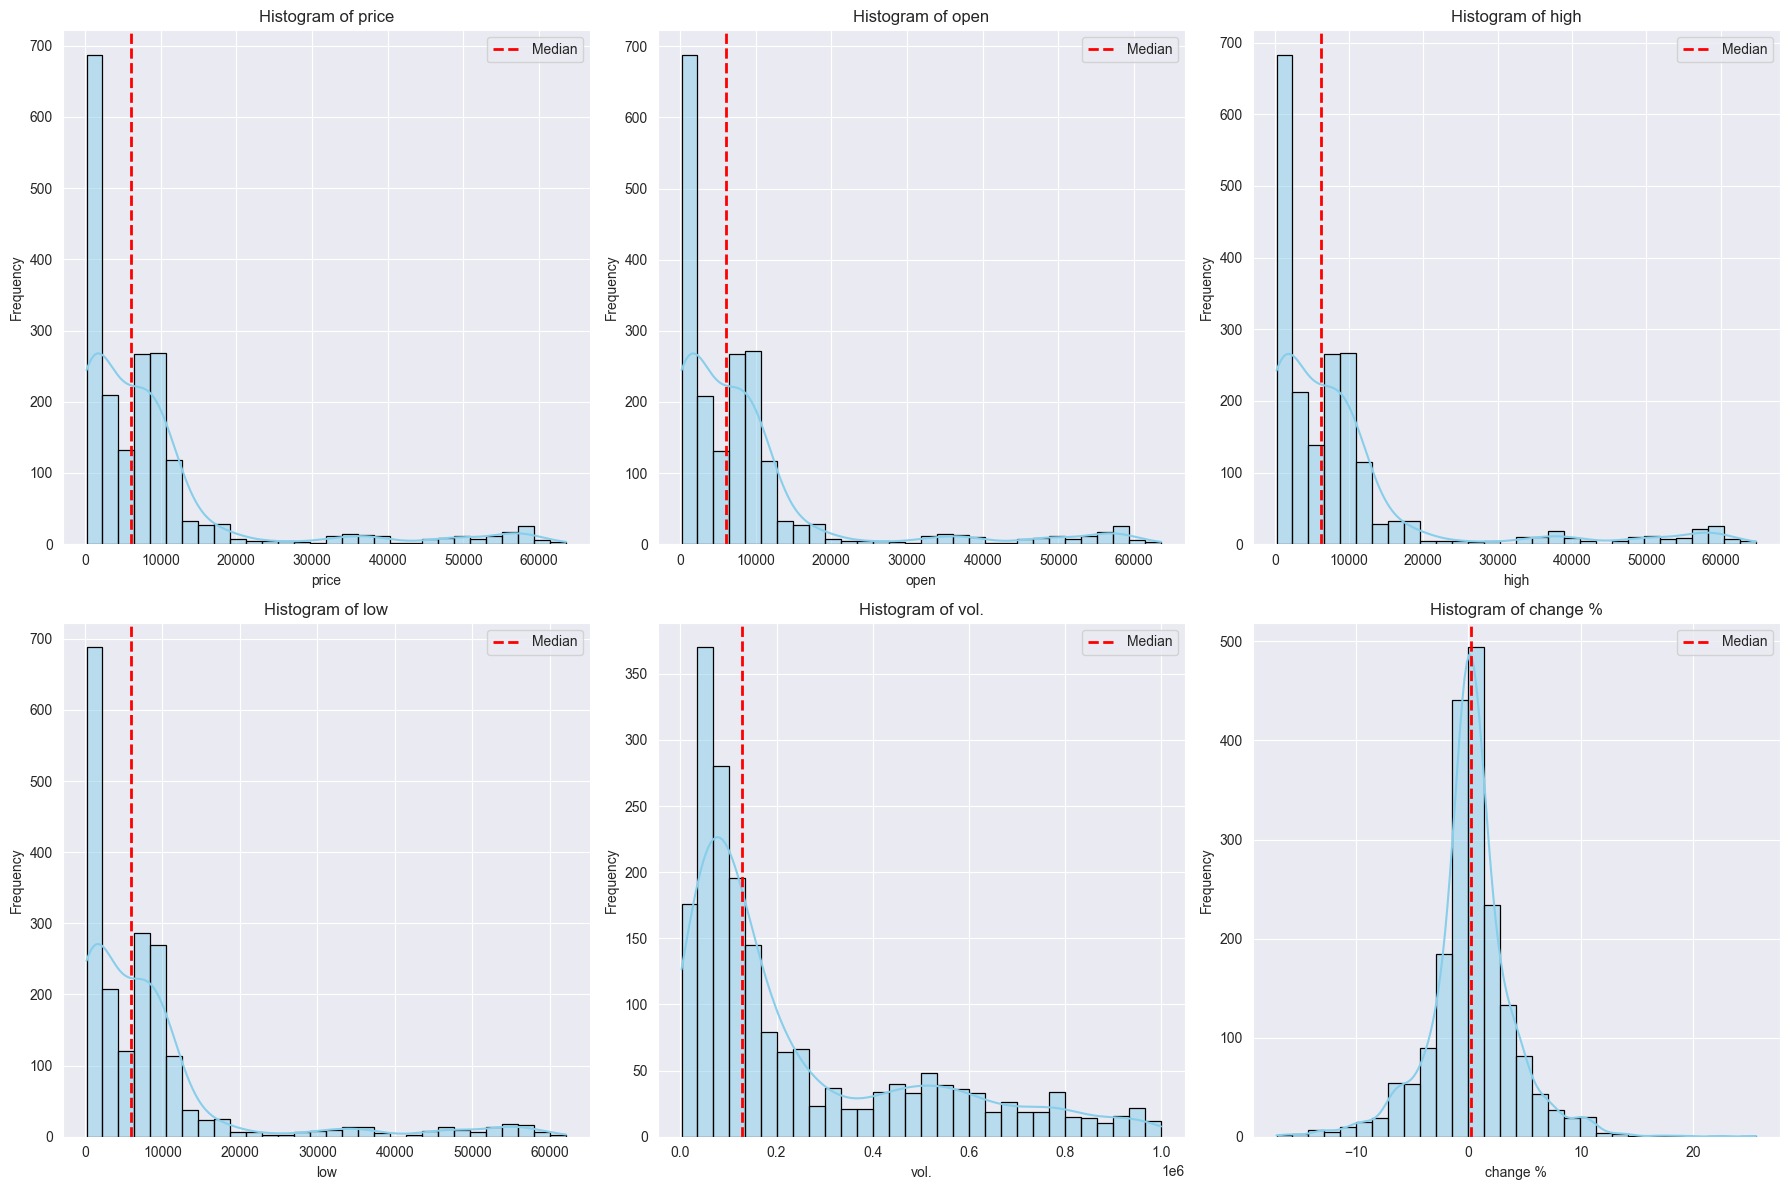

In [18]:
# 1. Median
median_values = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].median()
print("Median values:")
print(median_values)

# Set the number of subplots based on the number of columns
numerical_cols = ['price', 'open', 'high', 'low', 'vol.', 'change %']
num_cols = len(numerical_cols)

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black')

    # Calculate and plot the median
    median_value = df[col].median()
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label='Median')

    # Add titles and labels
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


Interquartile Range (IQR):
price         9010.40
open          8994.25
high          9216.75
low           8778.40
vol.        310445.00
change %         2.96
dtype: float64


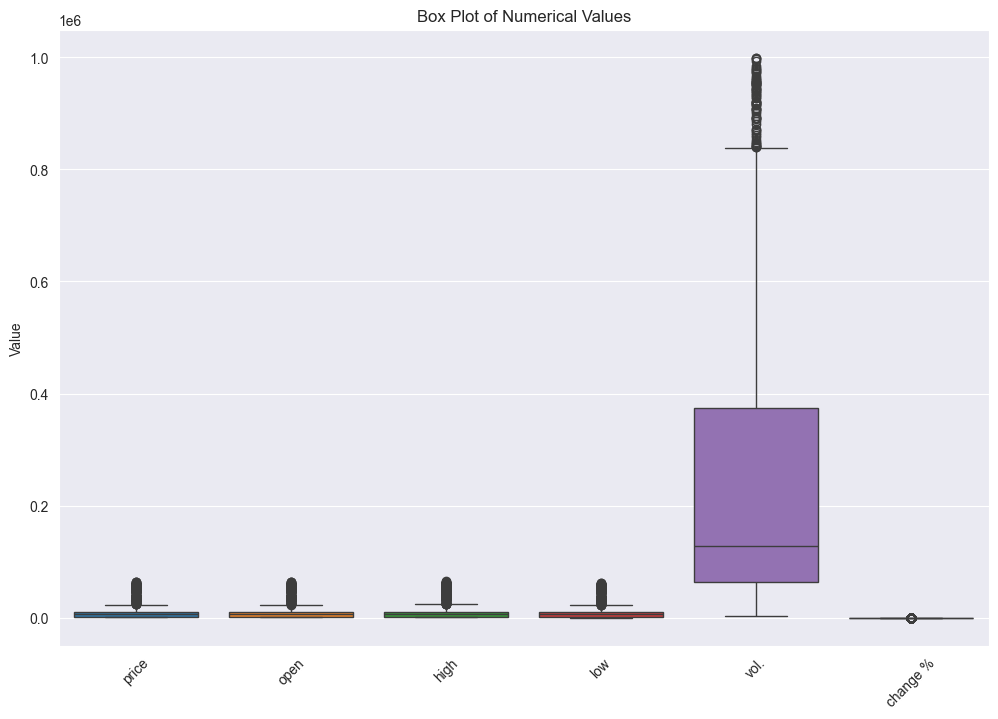

In [19]:
# Calculate the Interquartile Range (IQR)
Q1 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.25)
Q3 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR):")
print(IQR)

# Visualize by boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['price', 'open', 'high', 'low', 'vol.', 'change %']])  # Fixed data selection
plt.title('Box Plot of Numerical Values')  # Fixed title syntax
plt.ylabel('Value')  # Updated to generalize to all numerical values
plt.xticks(rotation=45)
plt.show()



Spearman’s Rank Correlation (Price vs Volume):
Spearman correlation: 0.52, p-value: 3.37e-137


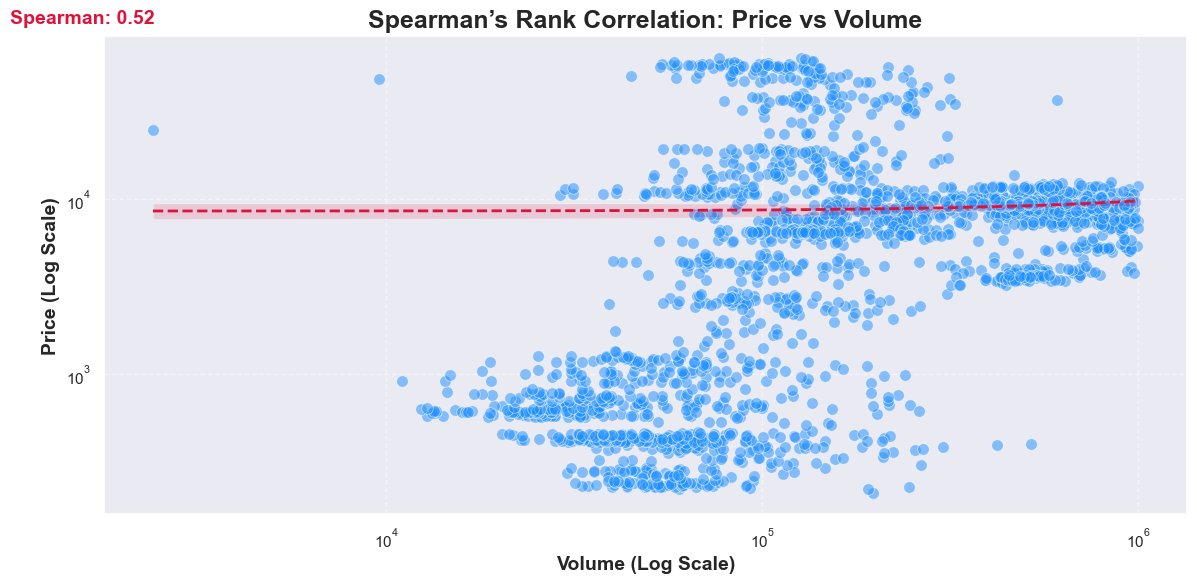

In [20]:
# Calculate Spearman’s Rank Correlation
corr_spearman, p_value_spearman = spearmanr(df['price'], df['vol.'])
print("\nSpearman’s Rank Correlation (Price vs Volume):")
print(f"Spearman correlation: {corr_spearman:.2f}, p-value: {p_value_spearman:.2e}")

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a scatter plot with enhancements for better visualization
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='vol.', y='price', data=df, alpha=0.5, color='dodgerblue', edgecolor='w', s=70)

# Fit a regression line
sns.regplot(x='vol.', y='price', data=df, scatter=False, color='crimson', line_kws={"linestyle":"--", "linewidth": 2})

# Highlight correlation in the plot
plt.text(1e3, 1e5, f"Spearman: {corr_spearman:.2f}", fontsize=14, color='crimson', fontweight='bold')

# Customize the plot
plt.title('Spearman’s Rank Correlation: Price vs Volume', fontsize=18, fontweight='bold')
plt.xlabel('Volume (Log Scale)', fontsize=14, fontweight='bold')
plt.ylabel('Price (Log Scale)', fontsize=14, fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot with tight layout
plt.tight_layout()
plt.show()


Kendall’s Tau (Price vs Volume):
Kendall Tau: 0.3338, p-value: 0.0000


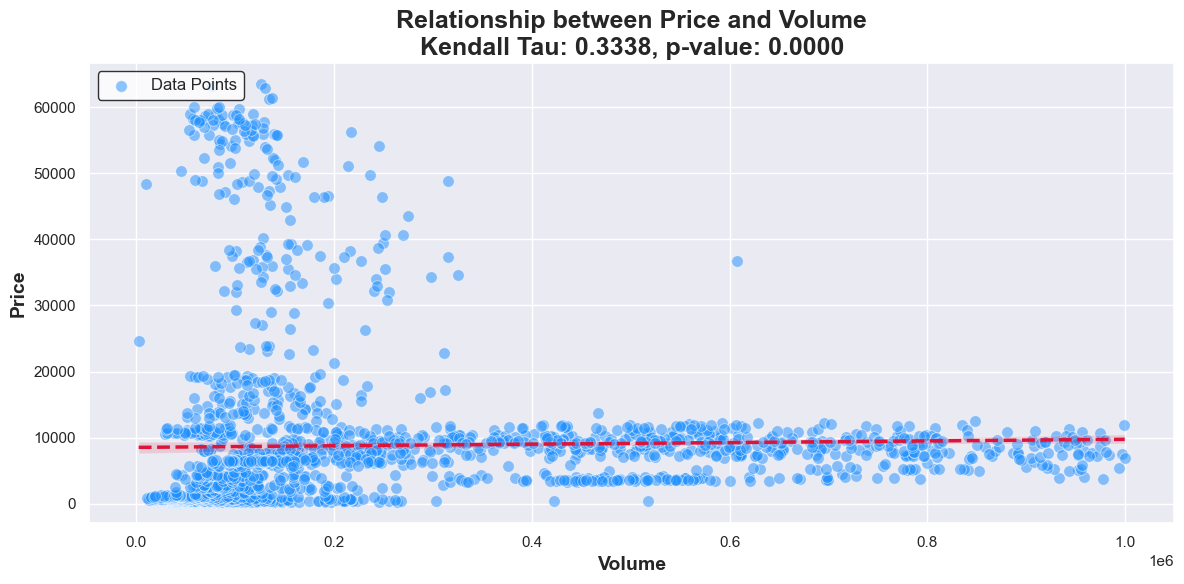

In [21]:
 #Calculate Kendall’s Tau between price and volume
tau_kendall, p_value_kendall = kendalltau(df['price'], df['vol.'])
print("\nKendall’s Tau (Price vs Volume):")
print(f"Kendall Tau: {tau_kendall:.4f}, p-value: {p_value_kendall:.4f}")

# Set the style for the plot with dark background for emphasis
sns.set(style="darkgrid")

# Create a scatter plot with enhancements for better presentation
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x=df['vol.'], y=df['price'], alpha=0.5, color='dodgerblue', s=70, edgecolor='w', label='Data Points')

# Add a regression line with a bold style
regression_line = sns.regplot(x=df['vol.'], y=df['price'], scatter=False, color='crimson',
                              line_kws={'label': 'Regression Line', 'linestyle': '--', 'linewidth': 2.5})

# Customize plot title and labels
plt.title(f'Relationship between Price and Volume\nKendall Tau: {tau_kendall:.4f}, p-value: {p_value_kendall:.4f}', fontsize=18, fontweight='bold')
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Wilcoxon Test - Close vs Open: Statistic=860824.5, P-value=0.0009617954000322258
Wilcoxon Test - Volume vs Change %: Statistic=0.0, P-value=0.0


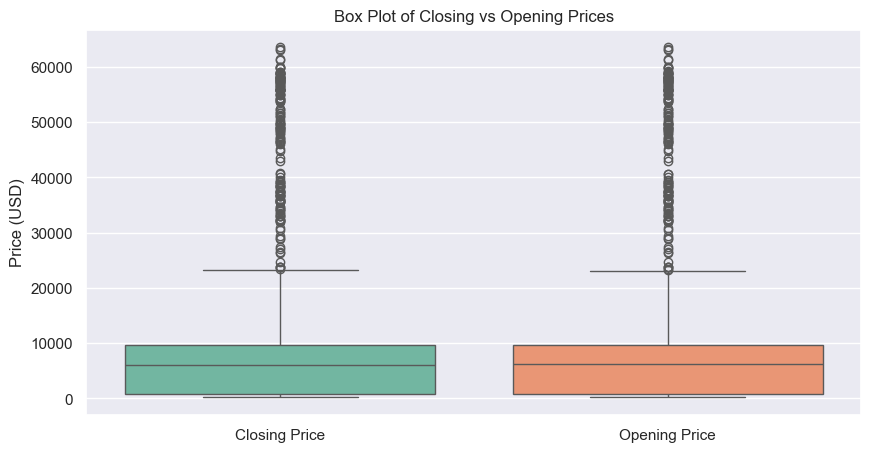

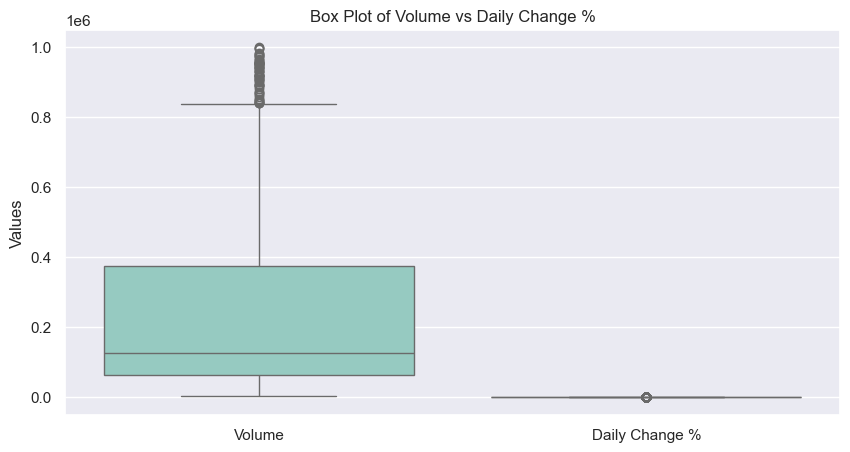

In [22]:
# Assuming 'price' is your closing price
closing_price = df['price'].astype(float)  # Ensure it's float
opening_price = df['open'].astype(float)  # Ensure it's float
daily_change_pct = df['change %'].astype(float)  # Assuming this column exists and is cleaned
volume = df['vol.'].astype(float)  # Ensure it's float

# Perform Wilcoxon Signed-Rank Test for Closing Price vs. Open Price
stat_close_open, p_close_open = wilcoxon(closing_price, opening_price)

# Perform Wilcoxon Signed-Rank Test for Volume vs. Daily Price Change
stat_vol_change, p_vol_change = wilcoxon(volume, daily_change_pct)

# Print results
print("Wilcoxon Test - Close vs Open: Statistic={}, P-value={}".format(stat_close_open, p_close_open))
print("Wilcoxon Test - Volume vs Change %: Statistic={}, P-value={}".format(stat_vol_change, p_vol_change))

# Visualization - Boxplot for Close vs Open
plt.figure(figsize=(10, 5))
sns.boxplot(data=[closing_price, opening_price], palette="Set2")
plt.title('Box Plot of Closing vs Opening Prices')
plt.ylabel('Price (USD)')
plt.xticks([0, 1], ['Closing Price', 'Opening Price'])

plt.show()

# Visualization - Boxplot for Volume vs Change %
plt.figure(figsize=(10, 5))
sns.boxplot(data=[volume, daily_change_pct], palette="Set3")
plt.title('Box Plot of Volume vs Daily Change %')
plt.ylabel('Values')
plt.xticks([0, 1], ['Volume', 'Daily Change %'])

plt.show()



Mann-Whitney U Statistic: 369703.5
P-value: 9.382568566230266e-123
There is a statistically significant difference in prices between high and low volume days.


/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/3921472914.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='volume_category', y='price', data=df, order=['Low', 'High'],


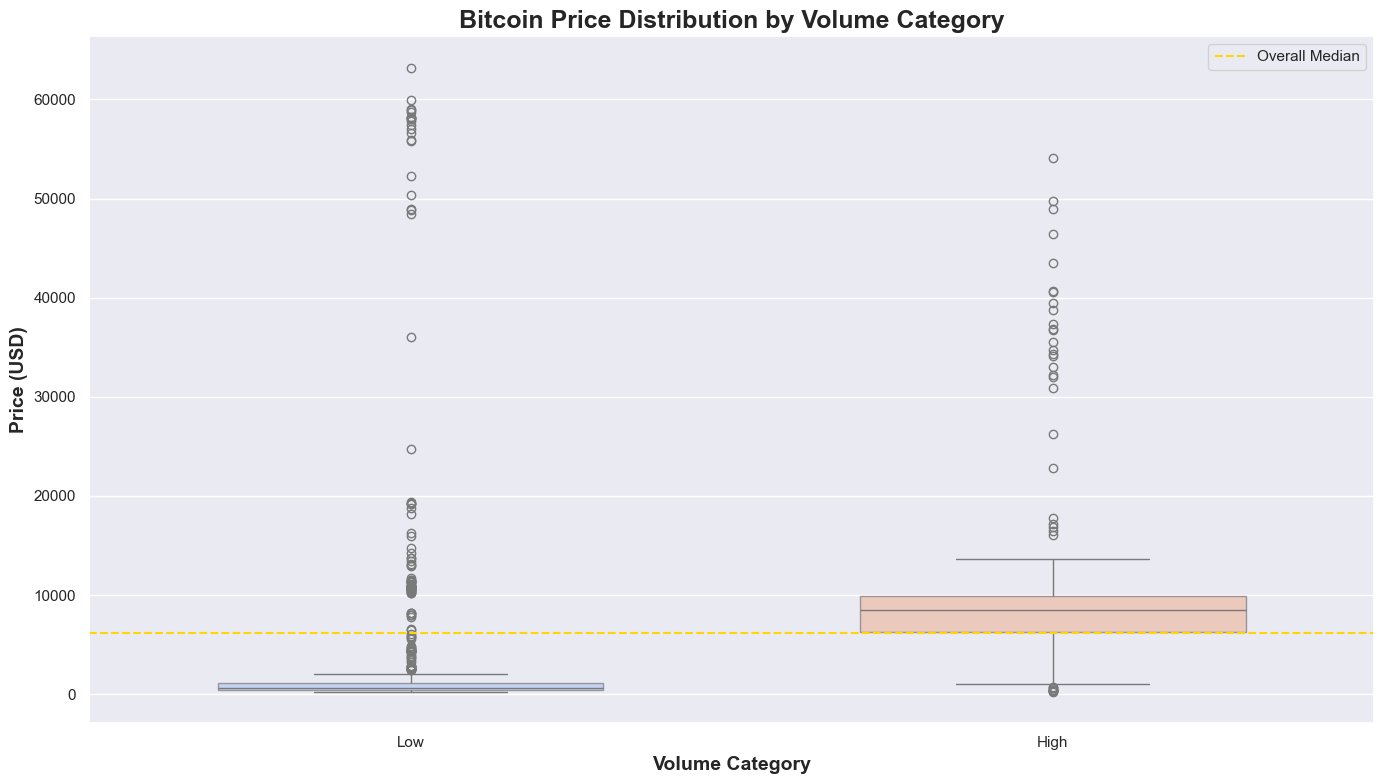

In [23]:
# Separate data into two groups
high_volume_prices = df[df['volume_category'] == 'High']['price']
low_volume_prices = df[df['volume_category'] == 'Low']['price']

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(high_volume_prices, low_volume_prices)

# Output results
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in prices between high and low volume days.")
else:
    print("There is no statistically significant difference in prices between high and low volume days.")

# Enhanced boxplot visualization
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")
sns.boxplot(x='volume_category', y='price', data=df, order=['Low', 'High'],
            palette='coolwarm', width=0.6, showfliers=True, boxprops=dict(alpha=0.7))

# Add titles and labels with bold formatting
plt.title('Bitcoin Price Distribution by Volume Category', fontsize=18, fontweight='bold')
plt.xlabel('Volume Category', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=14, fontweight='bold')

# Highlight the median lines
plt.axhline(df['price'].median(), color='gold', linestyle='--', linewidth=1.5, label='Overall Median')
plt.legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* U-Stat: Represent the sum of rank in the first group along the combined dataset, considering that group generally has ranks that higher than expected under the null hypothesis. High U indicates one rank higher than the other.
* P-value: Extremely small p-value indicates observed difference between high and low volume days 

In [24]:
# Initialize an empty list to store all headlines
all_headlines = []

# Iterate through each headline column and collect the headlines
for i in range(36):  # Assuming there are 36 headline columns named top_0 to top_35
    all_headlines.extend(df[f'top_{i}'].dropna().tolist())

# Convert list to a single string and then split into words
words = Counter(" ".join(all_headlines).split())

# Get the most common words
most_common_words = words.most_common(100)  # You can adjust this number for deeper analysis

# Display the most common words
print(most_common_words)


[('bitcoin', 12741), ('the', 8418), ('to', 6297), ('of', 4387), ('in', 4164), ('and', 3347), ('s', 3265), ('a', 3009), ('crypto', 2570), ('for', 2520), ('is', 2366), ('cryptocurrency', 2260), ('on', 1719), ('with', 1588), ('new', 1239), ('exchange', 1169), ('blockchain', 1114), ('that', 1064), ('as', 1015), ('at', 912), ('cash', 866), ('are', 836), ('btc', 835), ('it', 799), ('will', 763), ('by', 757), ('pr', 740), ('price', 733), ('from', 708), ('be', 701), ('this', 637), ('has', 626), ('you', 612), ('now', 609), ('said', 607), ('bank', 603), ('mining', 603), ('have', 555), ('more', 551), ('million', 550), ('cryptocurrencies', 545), ('we', 524), ('market', 513), ('an', 502), ('launches', 499), ('us', 495), ('trading', 489), ('how', 488), ('can', 477), ('its', 471), ('usd', 468), ('your', 459), ('bch', 459), ('time', 458), ('over', 452), ('says', 451), ('markets', 450), ('exchanges', 447), ('not', 443), ('digital', 442), ('up', 427), ('wallet', 411), ('1', 407), ('amp', 393), ('after',

In [25]:
keywords = {
    'security': ['hack', 'breach', 'cyberattack', ' security'],
    'regulation': ['regulation', 'law', 'legislation', ' government'],
    'product_launch': ['launch', 'release', 'introduced', 'new']
}

# Function to check if any keyword is in the text
def contains_keyword(text, keywords):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(keyword in text for keyword in keywords)

# Assuming 'df' has columns like 'top_0', 'top_1', ..., 'top_35'
# Adjust the lambda to use .iloc for safe positional access
for category, keys in keywords.items():
    df[category] = df[['top_' + str(i) for i in range(36)]].apply(
        lambda row: any(contains_keyword(row.iloc[i], keys) for i in range(36)), axis=1
    )

# Perform Kruskal-Wallis tests for each category against price
for category in keywords:
    with_keyword = df[df[category]]['price']
    without_keyword = df[~df[category]]['price']
    stat, p_value = kruskal(with_keyword, without_keyword)
    print(f"Kruskal-Wallis test for {category}: Statistic={stat}, P-value={p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"There is a statistically significant difference in prices on days with {category} news.")
    else:
        print(f"No significant difference in prices on days with {category} news.")

/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/3344401500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = df[['top_' + str(i) for i in range(36)]].apply(


Kruskal-Wallis test for security: Statistic=65.47518653586462, P-value=5.885029342205278e-16
There is a statistically significant difference in prices on days with security news.
Kruskal-Wallis test for regulation: Statistic=161.15246675292002, P-value=6.336562263642584e-37
There is a statistically significant difference in prices on days with regulation news.
Kruskal-Wallis test for product_launch: Statistic=372.0084351014772, P-value=6.837521206947698e-83
There is a statistically significant difference in prices on days with product_launch news.


/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/3344401500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = df[['top_' + str(i) for i in range(36)]].apply(
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/3344401500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = df[['top_' + str(i) for i in range(36)]].apply(


/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/460935428.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Category'] = 'Without ' + category.capitalize()
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/460935428.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Category'] = 'Without ' + category.capitalize()
/var/folders/vh/b_y7_6fs0f9ddd0rsmt4jjl80000gn/T/ipykernel_6569/460935428.py:18: SettingWithCopyWarning: 
A value is trying to be set on a cop

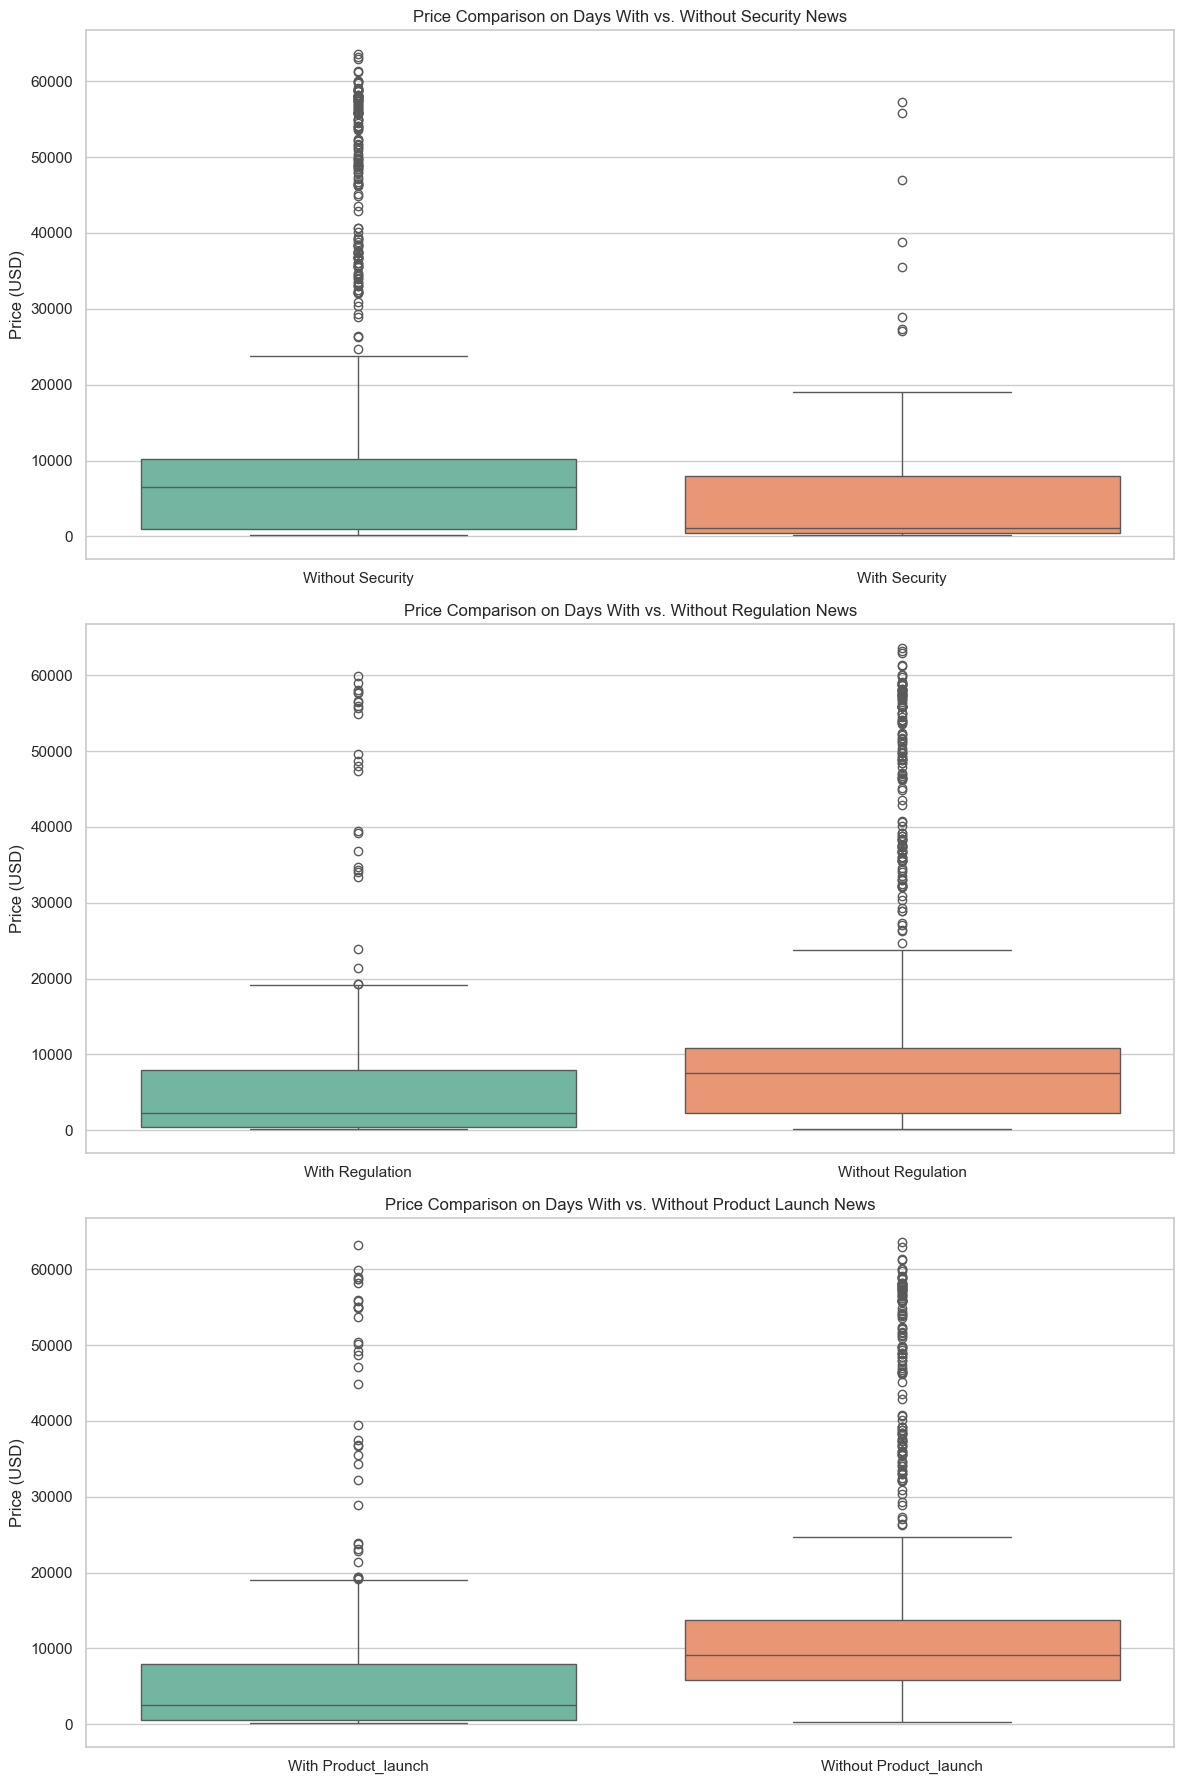

In [26]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Titles for the plots
categories = ['security', 'regulation', 'product_launch']
titles = [
    'Price Comparison on Days With vs. Without Security News',
    'Price Comparison on Days With vs. Without Regulation News',
    'Price Comparison on Days With vs. Without Product Launch News'
]

# Loop through categories to create a boxplot for each
for i, category in enumerate(categories):
    # Prepare data for the boxplot
    df['Price Category'] = 'Without ' + category.capitalize()
    df.loc[df[category], 'Price Category'] = 'With ' + category.capitalize()

    # Create the boxplot adapting the use of `palette` and `hue`
    sns.boxplot(x='Price Category', y='price', hue='Price Category',
                data=df, ax=axes[i], palette="Set2", dodge=False)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend([],[], frameon=False)  # Remove legend if unnecessary

# Adjust layout
plt.tight_layout()
plt.show()



* Security News: Negative signal for the market reaction to security concerns, since it could be panic selling or increased trading volume as traders reaction to news
* Product Launch: Positive reaction related to product launch, attributed to investor optimism about new technologies, services, or partnership that are perceived as beneficial for the market. 
* Regulation news: Similar to news, days with regulation show a lower median price compared to days without such news. The presence of regulation or government-related news might create uncertainty or fear of restrictive measures that could hinder the cryptocurrency's growth or ability

### d. Comparison between parametric and non-parametric


## 2. Handling Missing Values in Time Series


In [27]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine results into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

                    Missing Values  Percentage
top_1                           27    1.386749
top_2                           99    5.084746
top_3                          291   14.946071
top_4                          439   22.547509
top_5                          659   33.846944
top_6                          826   42.424242
top_7                          967   49.666153
top_8                         1105   56.753980
top_9                         1205   61.890087
top_10                        1277   65.588084
top_11                        1360   69.851053
top_12                        1445   74.216744
top_13                        1513   77.709296
top_14                        1580   81.150488
top_15                        1643   84.386235
top_16                        1678   86.183873
top_17                        1718   88.238315
top_18                        1750   89.881870
top_19                        1781   91.474063
top_20                        1804   92.655367
top_21       

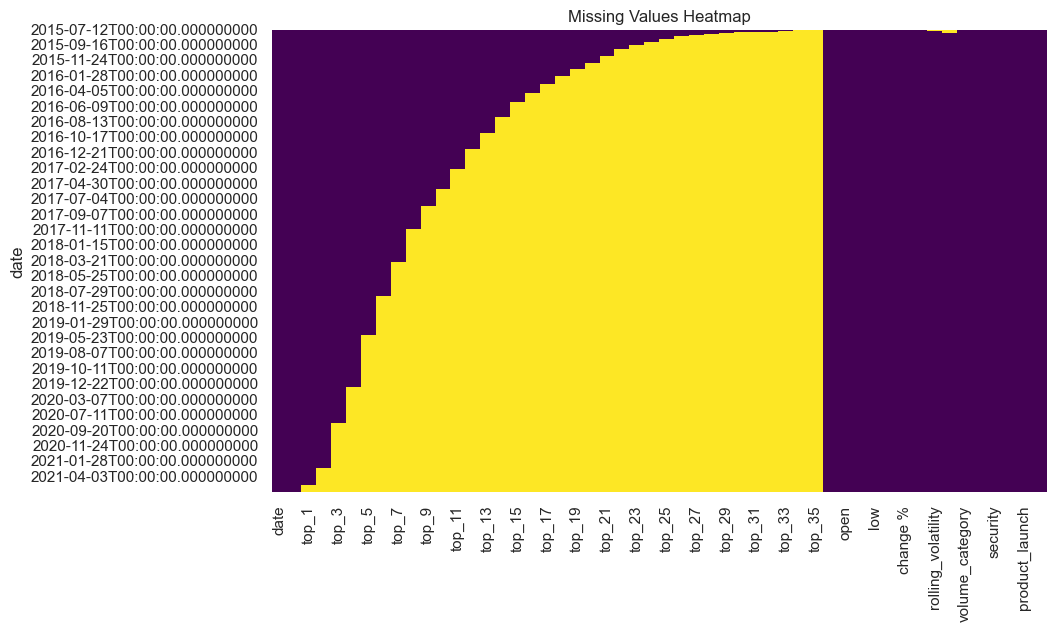

In [28]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### b. Methods to handle missing values: Forward Filling 

In [29]:
df = df.ffill()

In [30]:
#Check for missing values in all columns
missing_values = df.isna().sum()

# Display the number of missing values in each column
print("Missing values in each column after forward filling:")
print(missing_values)

Missing values in each column after forward filling:
date                   0
top_0                  0
top_1                  0
top_2                  0
top_3                  0
top_4                  0
top_5                  0
top_6                  0
top_7                  0
top_8                  0
top_9                  0
top_10                 0
top_11                 0
top_12                 0
top_13                 0
top_14                 0
top_15                 0
top_16                 0
top_17                 0
top_18                 0
top_19                 0
top_20                 0
top_21                 0
top_22                 0
top_23                 0
top_24                 0
top_25                 0
top_26                 0
top_27                 0
top_28                 0
top_29                 0
top_30                 0
top_31                 0
top_32                 0
top_33                 0
top_34                 0
top_35                 0
price                 


## 3. Identifying Outliers in Time Series


### a. Visualize using box plot and time series plot

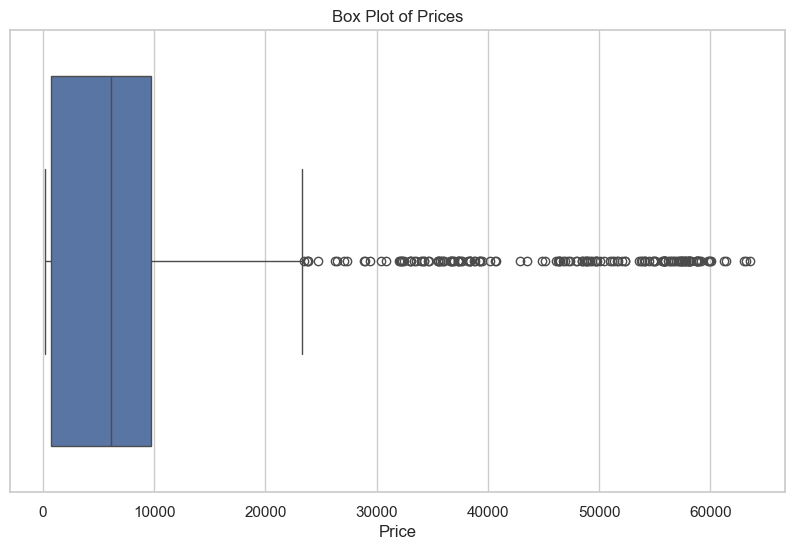

In [31]:
#1. Visualize by box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

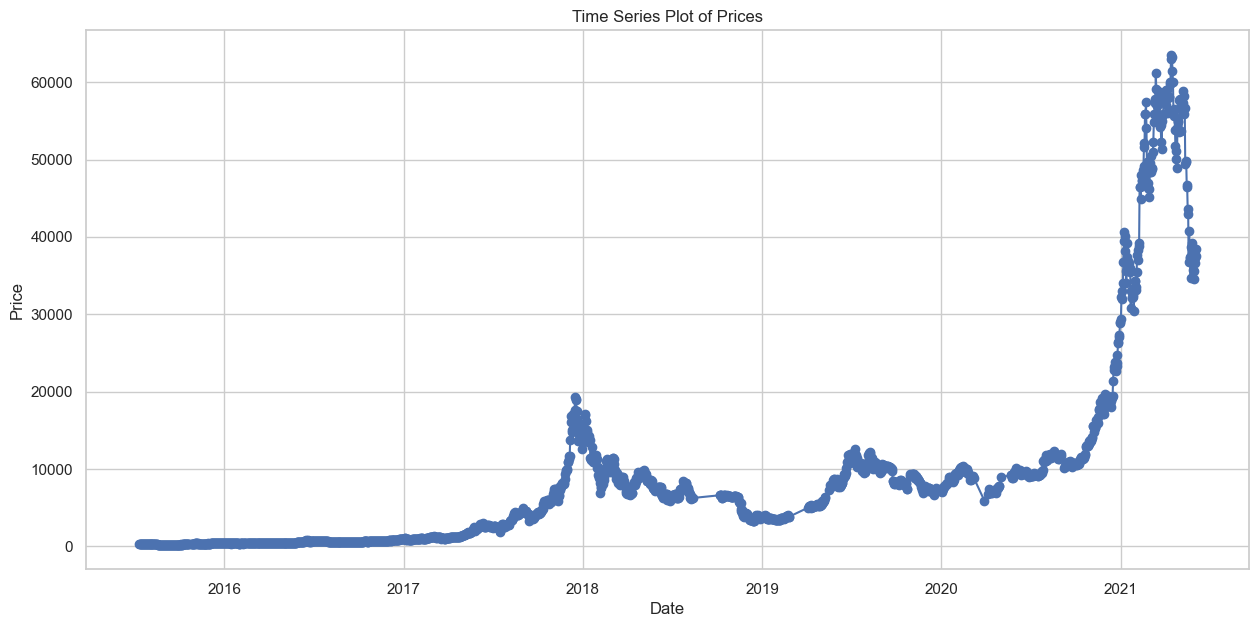

In [32]:
#2 Visualize by Time Series Plot
plt.figure(figsize=(15, 7))
plt.plot(df['date'], df['price'], label='Price', marker='o', linestyle='-')
plt.title('Time Series Plot of Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [33]:
df['vol.'] = df['vol.'].astype(str)
df['vol.'] = df['vol.'].str.replace('K', '').str.strip()
non_numeric = df['vol.'][~df['vol.'].str.isnumeric()]
df['vol.'] = pd.to_numeric(df['vol.'], errors='coerce') * 1000

# Check for NaN values after conversion
print(df['vol.'].isna().sum())


0


### b. Explore the ways to find outliers

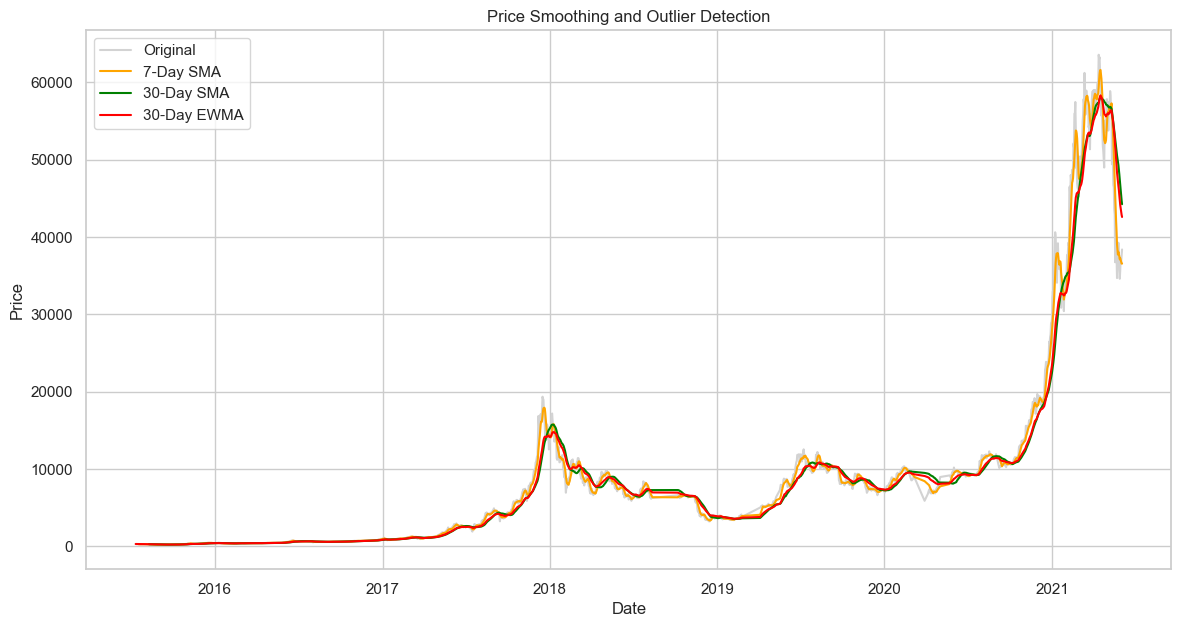

In [34]:
#Smmothing techniques
df['Date'] = pd.to_datetime(df['date'])

# 1. Moving Averages
df['SMA_7'] = df['price'].rolling(window=7).mean()  # 7-day moving average
df['SMA_30'] = df['price'].rolling(window=30).mean()  # 30-day moving average

# 2. Exponential Smoothing
df['EWMA_30'] = df['price'].ewm(span=30, adjust=False).mean()  # 30-day exponential moving window

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['price'], label='Original', color='lightgray')
plt.plot(df['Date'], df['SMA_7'], label='7-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df['Date'], df['EWMA_30'], label='30-Day EWMA', color='red')
plt.title('Price Smoothing and Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

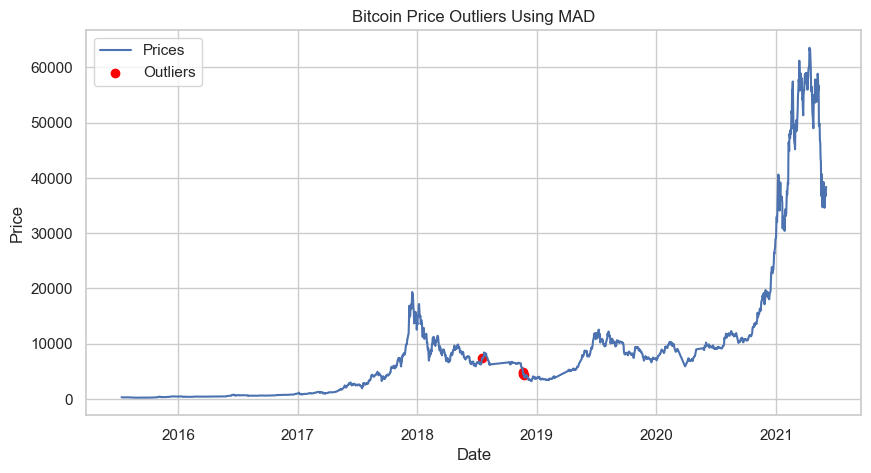

In [35]:
# Methods for handling outliers: MAD
median_price = df['price'].median()
abs_dev = np.abs(df['price'] - median_price)
MAD = abs_dev.rolling(window=20, min_periods=1).mean()
threshold = 3 * MAD

# Identify outliers
outliers = abs_dev > threshold

# Optional: Create a new column to flag outliers
df['is_outlier'] = outliers

plt.figure(figsize=(10, 5))
plt.plot(df['price'], label='Prices')
plt.scatter(df.index[outliers], df['price'][outliers], color='red', label='Outliers')
plt.title('Bitcoin Price Outliers Using MAD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



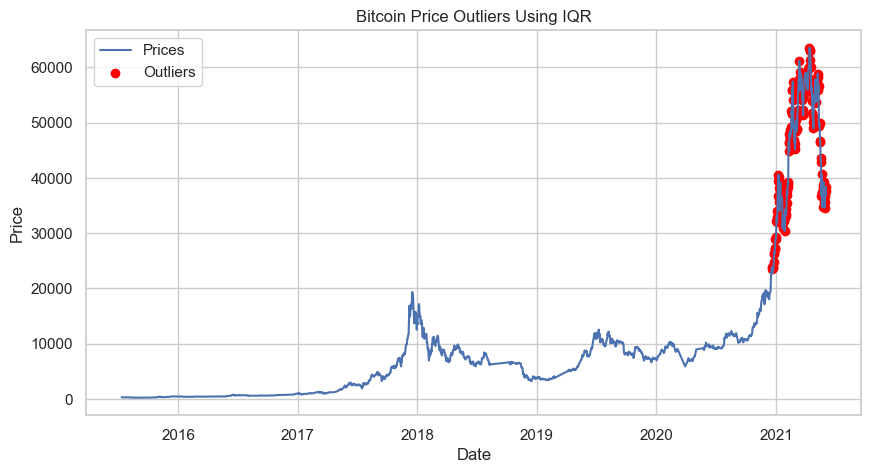

In [36]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Step 2: Compute the IQR
IQR = Q3 - Q1

# Step 3: Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = (df['price'] < lower_bound) | (df['price'] > upper_bound)

# Optional: Create a new column to flag outliers
df['is_outlier'] = outliers

# Visualizing the results
plt.figure(figsize=(10, 5))
plt.plot(df['price'], label='Prices')
plt.scatter(df.index[outliers], df['price'][outliers], color='red', label='Outliers')
plt.title('Bitcoin Price Outliers Using IQR')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
df

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,day_of_week,security,regulation,product_launch,Price Category,Date,SMA_7,SMA_30,EWMA_30,is_outlier
date,,,,,,,,,,,,,,,,,,,,,
2015-07-12,2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,Sunday,False,True,True,With Product_launch,2015-07-12,NaN,NaN,310.400000,False
2015-07-13,2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,Monday,True,True,True,With Product_launch,2015-07-13,NaN,NaN,309.109677,False
2015-07-14,2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,Tuesday,True,False,True,With Product_launch,2015-07-14,NaN,NaN,307.683247,False
2015-07-15,2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take ...,e coin bitcoin cards an interview with georgy...,...,Wednesday,False,False,True,With Product_launch,2015-07-15,NaN,NaN,306.116586,False
2015-07-16,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,Thursday,False,True,True,With Product_launch,2015-07-16,NaN,NaN,304.212290,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30,2021-05-30,after the installation of microbt whatsminers ...,beijing to disperse 6 million in digital yuan...,combating ransomware is a priority for the ad...,guggenheim has registered a fund with the sec ...,the most recent 2009 spend moved last year an...,generally when bitcoin gets that mispriced ...,it will take some time before we see substant...,we have a strong conviction that digital asse...,below the sculpted hoodie nakamoto s face wil...,...,Sunday,False,False,False,Without Product_launch,2021-05-30,37242.185714,46739.663333,44122.619226,True
2021-05-31,2021-05-31,brazil is one of the pioneers of cdbc s study ...,beijing to disperse 6 million in digital yuan...,combating ransomware is a priority for the ad...,guggenheim has registered a fund with the sec ...,the most recent 2009 spend moved last year an...,generally when bitcoin gets that mispriced ...,it will take some time before we see substant...,we have a strong conviction that digital asse...,below the sculpte

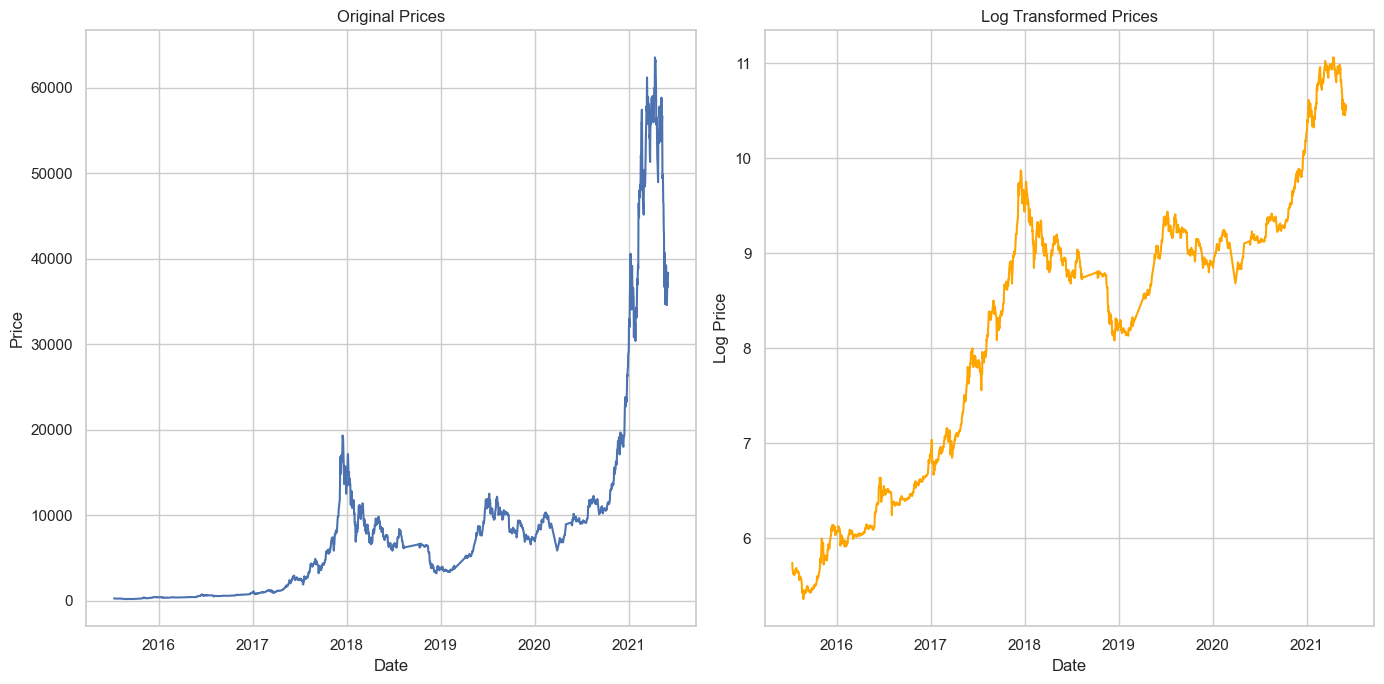

In [38]:
df['log_price'] = np.log1p(df['price'])  # Using log1p for safe logarithmic transformation

# Plot the original and logarithmic transformed prices
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df['date'], df['price'], label='Original Prices')
plt.title('Original Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.plot(df['date'], df['log_price'], label='Log Transformed Prices', color='orange')
plt.title('Log Transformed Prices')
plt.xlabel('Date')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()


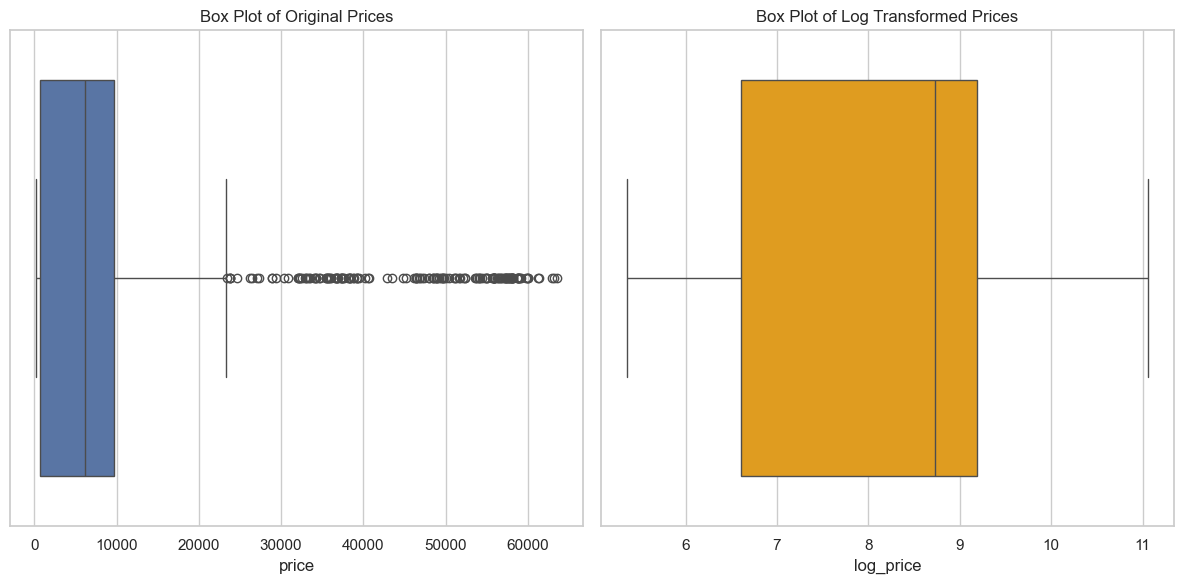

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot of Original Prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_price'], color='orange')
plt.title('Box Plot of Log Transformed Prices')

plt.tight_layout()
plt.show()

## 4. Exploring Moving Averages in Time Series

### a. Calculate various types of moving averages (simple, exponential) and analyze their effects on the time series

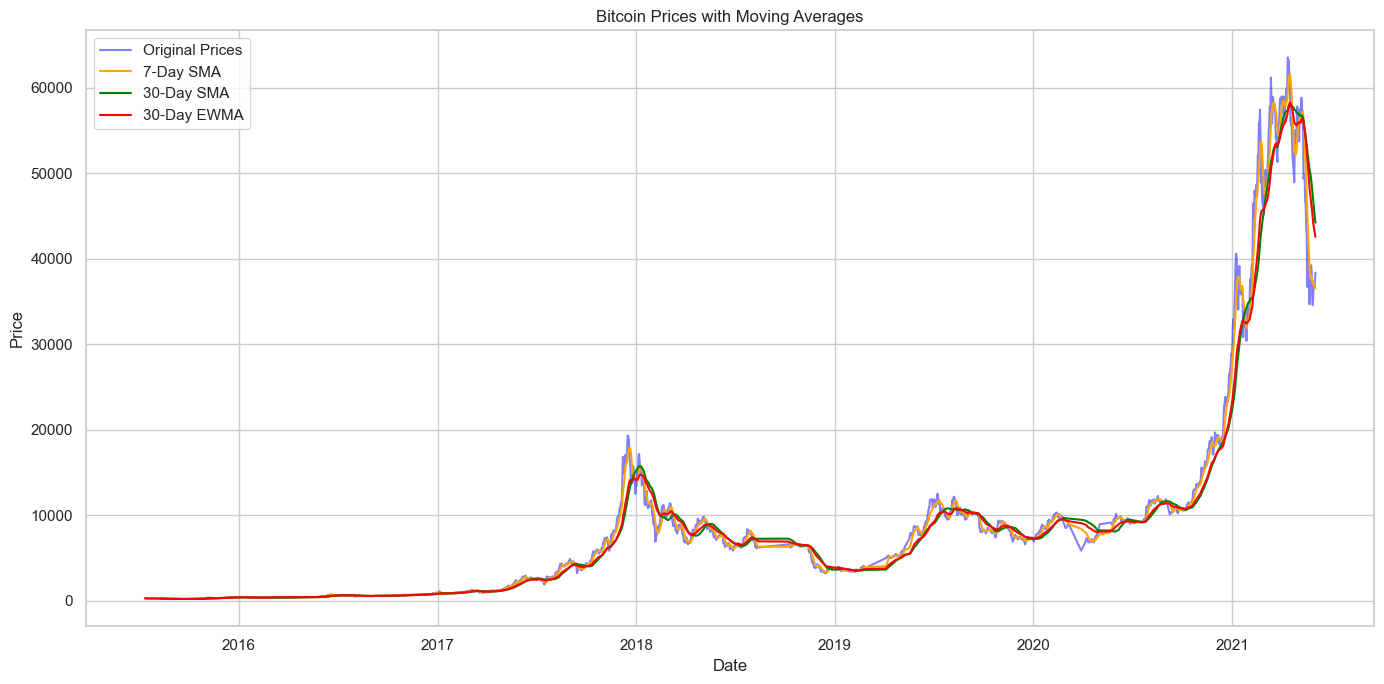

In [40]:
if 'price' in df.columns:
    price_column = 'price'
elif 'Price' in df.columns:
    price_column = 'Price'
else:
    raise KeyError("Neither 'price' nor 'Price' column found in the DataFrame.")

# Calculate short-term and long-term moving averages
df['SMA_7'] = df[price_column].rolling(window=7).mean()  # 7-day simple moving average
df['SMA_30'] = df[price_column].rolling(window=30).mean()  # 30-day simple moving average
df['EWMA_30'] = df[price_column].ewm(span=30, adjust=False).mean()  # 30-day exponential moving average

# Plotting original prices with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df[price_column], label='Original Prices', color='blue', alpha=0.5)
plt.plot(df['Date'], df['SMA_7'], label='7-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df['Date'], df['EWMA_30'], label='30-Day EWMA', color='red')

# Adding titles and labels
plt.title('Bitcoin Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### b. Compare short-term vs. long-term moving averages to highlight different trends.

In [41]:
# Identifying crossover points
df['Buy_Signal'] = (df['SMA_7'] > df['SMA_30']) & (df['SMA_7'].shift(1) <= df['SMA_30'].shift(1))
df['Sell_Signal'] = (df['SMA_7'] < df['SMA_30']) & (df['SMA_7'].shift(1) >= df['SMA_30'].shift(1))

In [42]:
# Step 1: Define Buy/Sell Signals
df['Buy_Signal'] = (df['SMA_7'] > df['SMA_30']) & (df['SMA_7'].shift(1) <= df['SMA_30'].shift(1))
df['Sell_Signal'] = (df['SMA_7'] < df['SMA_30']) & (df['SMA_7'].shift(1) >= df['SMA_30'].shift(1))

# Step 2: Calculate Buy/Sell Prices and Returns
df['Buy_Price'] = df[df['Buy_Signal']]['price']
df['Sell_Price'] = df[df['Sell_Signal']]['price']

# Forward-fill Buy_Price and backward-fill Sell_Price for paired trades
df['Buy_Price'] = df['Buy_Price'].ffill()
df['Sell_Price'] = df['Sell_Price'].bfill()

# Filter rows with valid Buy and Sell prices
trade_df = df[(df['Buy_Signal']) | (df['Sell_Signal'])].copy()
trade_df = trade_df[['date', 'Buy_Price', 'Sell_Price']].dropna()

# Calculate returns per trade
trade_df['Trade_Return'] = (trade_df['Sell_Price'] - trade_df['Buy_Price']) / trade_df['Buy_Price']

# Step 3: Calculate Strategy Metrics
total_trades = len(trade_df)
win_trades = len(trade_df[trade_df['Trade_Return'] > 0])
win_rate = (win_trades / total_trades) * 100 if total_trades > 0 else 0
average_return = trade_df['Trade_Return'].mean()

# Cumulative returns and max drawdown
df['Cumulative_Return'] = (1 + trade_df['Trade_Return']).cumprod()
rolling_max = df['Cumulative_Return'].cummax()
drawdown = (df['Cumulative_Return'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Display results
print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Average Return per Trade: {average_return:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")


Total Trades: 70
Win Rate: 45.71%
Average Return per Trade: 0.2552
Maximum Drawdown: -0.6322


### c. Visualize the moving averages alongside the original data to provide clarity.


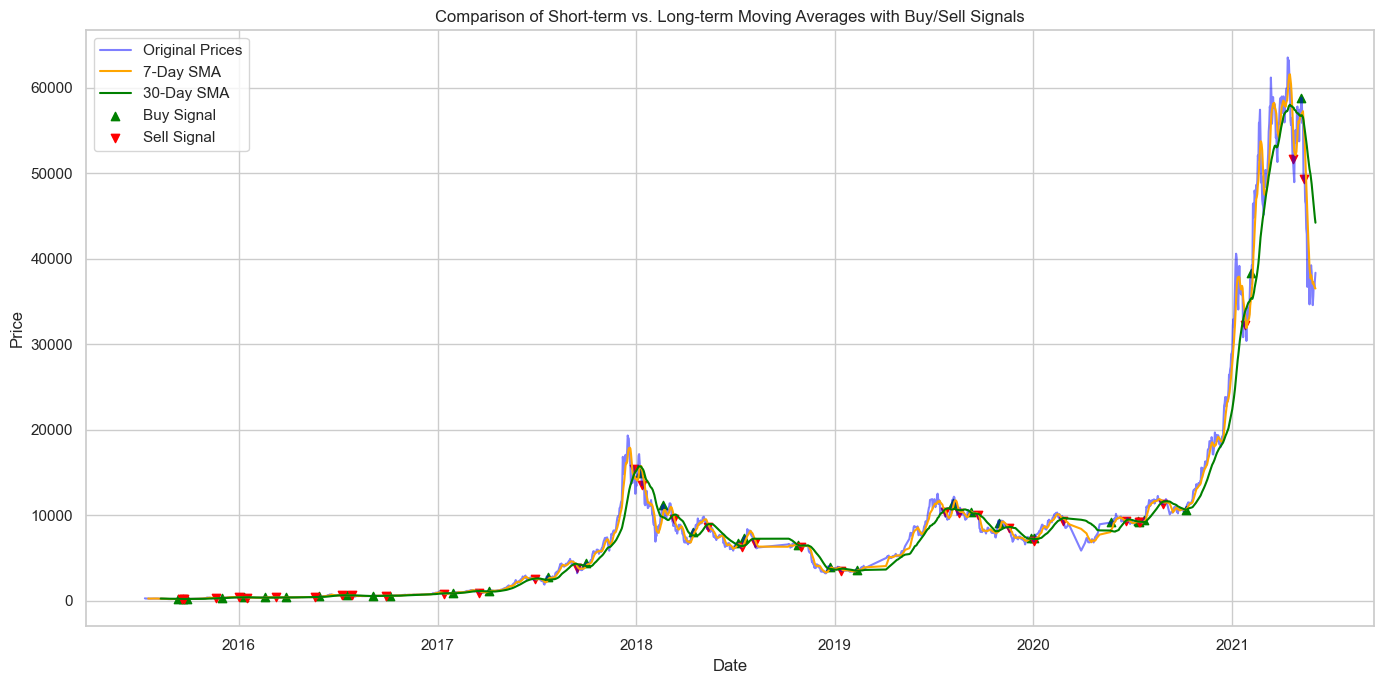

In [43]:
# Plotting the original price and moving averages with buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df[price_column], label='Original Prices', color='blue', alpha=0.5)
plt.plot(df['Date'], df['SMA_7'], label='7-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_30'], label='30-Day SMA', color='green')

# Highlighting buy/sell signals
plt.scatter(df[df['Buy_Signal']]['Date'], df[df['Buy_Signal']][price_column], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(df[df['Sell_Signal']]['Date'], df[df['Sell_Signal']][price_column], label='Sell Signal', marker='v', color='red', alpha=1)

# Adding titles and labels
plt.title('Comparison of Short-term vs. Long-term Moving Averages with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Exploring Lag Variables in Time Series

### a. Use autocorrelation functions (ACF) and partial autocorrelation functions (PACF) to identify significant lags.

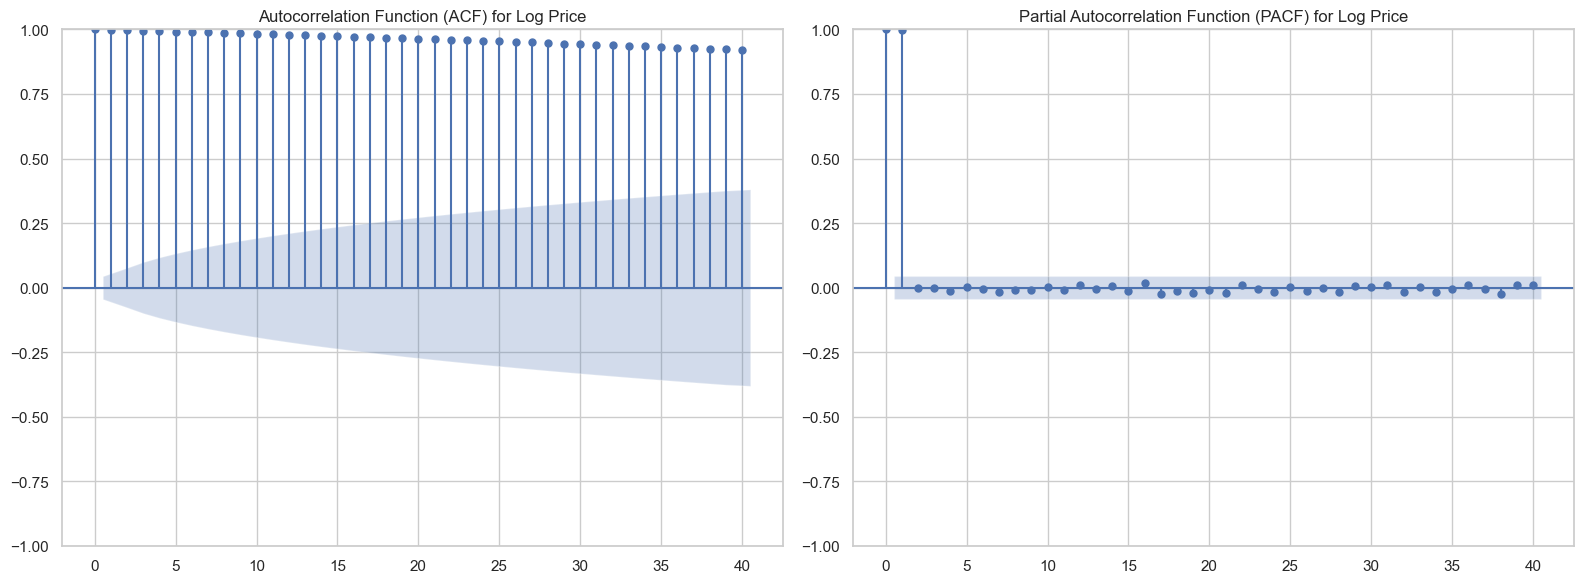

In [44]:
# Plotting ACF and PACF for the log-transformed price
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
plot_acf(df['log_price'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) for Log Price')

# PACF plot
plot_pacf(df['log_price'].dropna(), lags=40, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF) for Log Price')

plt.tight_layout()
plt.show()

### b. Understand the importance of lag variables in forecasting.

1. Autocorrelation Function (ACF) 
* ACF plot shows very strong autocorrelation accross multiple lags, which indicates persistent patterns and suggests long-term dependencies in the data
* Such behavior is common in non-stationary time series and highlight potential trends or seasonality in the series
* The persistent nature of ACF indicates the data might not be stationary, confirming the earlier assumption of non-stationary of Bitcoin prices

2. Partial Autocorrelation Function (PACF)
* The PACF plot shows a significant spike at the first lag and drops off rapidly afterward
* This suggests that a 1-day lag is the most significant lag when it comes to explaining variations in the current value, with other lags contributing less directly 

### 6. Metrics for Time Series Prediction

In [45]:
    # Sample true values and predicted values
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate R²
r_squared = r2_score(y_true, y_pred)

# Print results
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R²: {r_squared}')

MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
MAPE: 32.73809523809524
R²: 0.9486081370449679


1. **MAE**: 0.5
   - **Interpretation**: On average, your model's predictions are 0.5 units off from the actual values. This is relatively small, especially if the range of your data is large.
   - **Conclusion**: A low MAE is a positive sign, suggesting your model performs well in terms of prediction error.

2. **MSE**: 0.375
   - **Interpretation**: The squared errors average 0.375, meaning that the error is relatively low, though MSE emphasizes larger errors. This is good if larger errors are not common in your dataset.
   - **Conclusion**: Since this is a small value, your model doesn't have significant large errors, indicating good predictive performance.

3. **RMSE**: 0.612
   - **Interpretation**: RMSE is in the same unit as your data and shows an average error of 0.612. RMSE usually highlights larger errors, but this value is still relatively small.
   - **Conclusion**: The RMSE value being close to the MAE suggests there aren’t extreme large errors skewing the results, which is a positive sign.

4. **MAPE**: 32.74%
   - **Interpretation**: On average, your model's predictions are off by about 32.74% from the actual values.
   - **Conclusion**: This is relatively high. Ideally, you'd want MAPE below 10-20% for a good forecasting model. It indicates that the model may not perform well for smaller values or the data has variability.

5. **R²**: 0.949
   - **Interpretation**: Your model explains 94.9% of the variance in the data, which indicates a strong fit.
   - **Conclusion**: An R² close to 1 is a good indicator that your model captures the patterns in the data well.

#### Overall Conclusion

Most metrics (**MAE**, **MSE**, **RMSE**, and **R²**) suggest that your model performs well, with low average errors and high explanatory power. However, the **MAPE** of 32.74% indicates that the model may have difficulty with smaller actual values or that some errors are disproportionately large in terms of percentage. 

## 7. Developing a Time Serie Model with Facebook prophet 

### Model A: Facebok Prophet model with numerical values

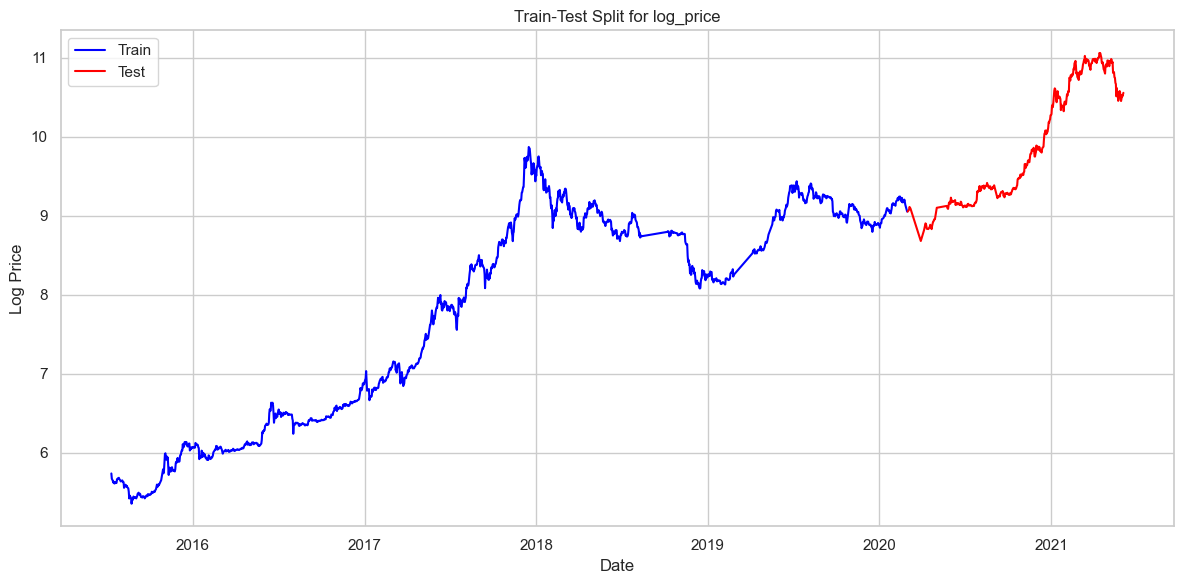

In [46]:
# Step 1: Split the dataset into training and testing sets
train_size = int(0.8 * len(df))  # 80% training, 20% testing
train_df = df[:train_size].copy()
test_df = df[train_size:].copy()

# Visualize the train-test split
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['log_price'], label='Train', color='blue')
plt.plot(test_df.index, test_df['log_price'], label='Test', color='red')
plt.title('Train-Test Split for log_price')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

train_prophet = train_df.reset_index(drop=True)[['date', 'log_price']]
train_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target

# Similarly, prepare the test set
test_prophet = test_df.reset_index(drop=True)[['date', 'log_price']]
test_prophet.columns = ['ds', 'y']


17:13:05 - cmdstanpy - INFO - Chain [1] start processing
17:13:06 - cmdstanpy - INFO - Chain [1] done processing
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.59
Root Mean Squared Error (RMSE): 0.66
Mean Absolute Percentage Error (MAPE): 5.89%
R-Squared: 0.16


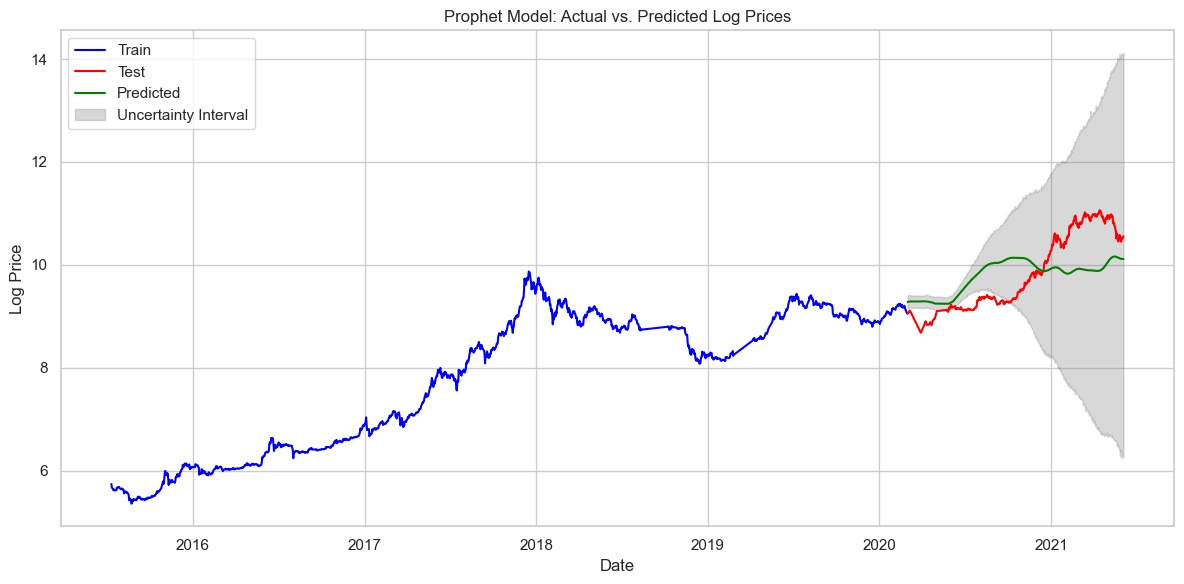

In [47]:
# Train the Prophet model
model = Prophet()
model.fit(train_prophet)

# Make predictions
future = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future)

# Evaluate the model
actual = test_df['log_price'].values
predicted = forecast['yhat'].iloc[train_size:].values

# Calculate MAE
mae = mean_absolute_error(actual, predicted)
# Calculate RMSE
rmse = mean_squared_error(actual, predicted, squared=False)
# Calculate R-squared
r2 = r2_score(actual, predicted)
# Calculate MAPE
mape = (np.mean(np.abs((actual - predicted) / actual)) * 100)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-Squared: {r2:.2f}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['log_price'], label='Train', color='blue')
plt.plot(test_df.index, test_df['log_price'], label='Test', color='red')
plt.plot(test_df.index, forecast['yhat'].iloc[train_size:], label='Predicted', color='green')
plt.fill_between(test_df.index,
                 forecast['yhat_lower'].iloc[train_size:],
                 forecast['yhat_upper'].iloc[train_size:],
                 color='gray', alpha=0.3, label='Uncertainty Interval')
plt.title('Prophet Model: Actual vs. Predicted Log Prices')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Model B: Facebook Prophet Model with additional regressors

17:13:07 - cmdstanpy - INFO - Chain [1] start processing
17:13:08 - cmdstanpy - INFO - Chain [1] done processing


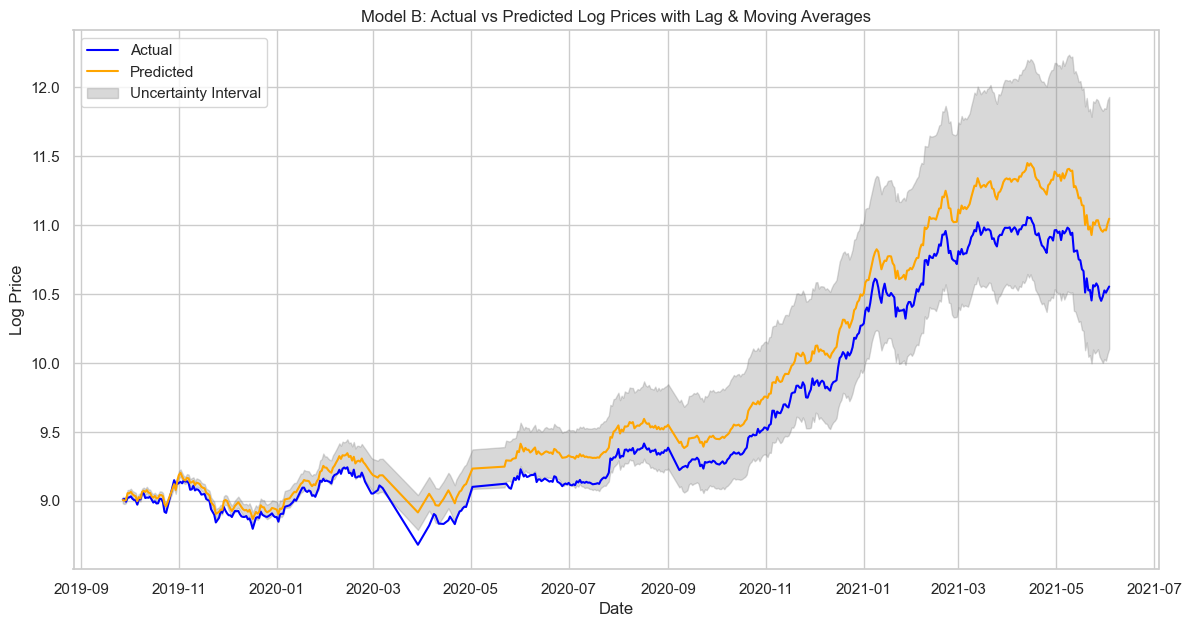

Model B - Mean Absolute Error (MAE): 0.20
Model B - Root Mean Squared Error (RMSE): 0.23
Model B - R-Squared: 0.90
Model B - Mean Absolute Percentage Error (MAPE): 2.00%
                   ds          y  Predicted_Log_Price
date                                                 
2021-05-25 2021-05-25  10.555274            11.003749
2021-05-26 2021-05-26  10.577712            11.035279
2021-05-27 2021-05-27  10.556289            11.036005
2021-05-28 2021-05-28  10.481883            10.991175
2021-05-29 2021-05-29  10.451193            10.964564
2021-05-30 2021-05-30  10.481611            10.952480
2021-05-31 2021-05-31  10.526738            10.967911
2021-06-01 2021-06-01  10.510221            10.962400
2021-06-02 2021-06-02  10.533610            11.012014
2021-06-03 2021-06-03  10.555128            11.047233


In [48]:
# Define window sizes for Moving Averages
short_term_window = 7   # 7 days for short-term trend
mid_term_window = 30    # 30 days for mid-term trend
long_term_window = 180  # 180 days for long-term trend

# Step 1: Add Moving Averages (SMA and EMA) and Lag Features
df['SMA_7'] = df['log_price'].rolling(window=short_term_window).mean()
df['SMA_30'] = df['log_price'].rolling(window=mid_term_window).mean()
df['SMA_180'] = df['log_price'].rolling(window=long_term_window).mean()
df['EMA_7'] = df['log_price'].ewm(span=short_term_window, adjust=False).mean()
df['EMA_30'] = df['log_price'].ewm(span=mid_term_window, adjust=False).mean()
df['EMA_180'] = df['log_price'].ewm(span=long_term_window, adjust=False).mean()

# Lag Features
df['lag_1'] = df['log_price'].shift(1)  # 1-day lag
df['lag_7'] = df['log_price'].shift(7)  # 7-day lag
df['lag_30'] = df['log_price'].shift(30)  # 30-day lag

# Clean the dataset
df_clean = df.dropna(subset=['SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180', 'lag_1', 'lag_7', 'lag_30', 'log_price'])
df_clean = df_clean.ffill()  # Use ffill() to forward-fill missing values

# Prepare the dataset for Prophet
df_prophet = df_clean[['date', 'log_price', 'SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180', 'lag_1', 'lag_7', 'lag_30']].rename(columns={'date': 'ds', 'log_price': 'y'})

# Split the data into 70% train and 30% test
train_size = int(len(df_prophet) * 0.7)
train, test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# Initialize and fit the Prophet model with additional regressors
prophet_model_b = Prophet()

# Add the regressors
regressors = ['SMA_7', 'SMA_30', 'SMA_180', 'EMA_7', 'EMA_30', 'EMA_180', 'lag_1', 'lag_7', 'lag_30']
for regressor in regressors:
    prophet_model_b.add_regressor(regressor)

# Fit the model
prophet_model_b.fit(train)

# Create a dataframe for future predictions
future_test = test[['ds'] + regressors].copy()

# Make predictions
forecast_test = prophet_model_b.predict(future_test)

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='orange')
plt.fill_between(forecast_test['ds'],
                 forecast_test['yhat_lower'],
                 forecast_test['yhat_upper'],
                 color='gray', alpha=0.3, label='Uncertainty Interval')
plt.title('Model B: Actual vs Predicted Log Prices with Lag & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mae_b = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse_b = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))

# Calculate R-squared using sklearn's r2_score
r_squared_b = r2_score(test['y'], forecast_test['yhat'])

# Calculate MAPE with aligned indices
aligned_test_y = test['y'].reset_index(drop=True)
aligned_pred_yhat = forecast_test['yhat'].reset_index(drop=True)

# Check for non-zero actual values and calculate MAPE
non_zero_mask = aligned_test_y != 0
if non_zero_mask.any():
    mape_b = np.mean(np.abs((aligned_test_y[non_zero_mask] - aligned_pred_yhat[non_zero_mask]) / aligned_test_y[non_zero_mask])) * 100
else:
    mape_b = np.nan

# Print evaluation metrics
print(f'Model B - Mean Absolute Error (MAE): {mae_b:.2f}')
print(f'Model B - Root Mean Squared Error (RMSE): {rmse_b:.2f}')
print(f'Model B - R-Squared: {r_squared_b:.2f}' if not np.isnan(r_squared_b) else 'Model B - R-Squared: Undefined')
print(f'Model B - Mean Absolute Percentage Error (MAPE): {mape_b:.2f}%' if not np.isnan(mape_b) else 'Model B - MAPE: Undefined')

# Display the last 10 rows of actual vs predicted values
result_df_b = test.copy()
result_df_b['Predicted_Log_Price'] = forecast_test['yhat'].values
print(result_df_b[['ds', 'y', 'Predicted_Log_Price']].tail(10))




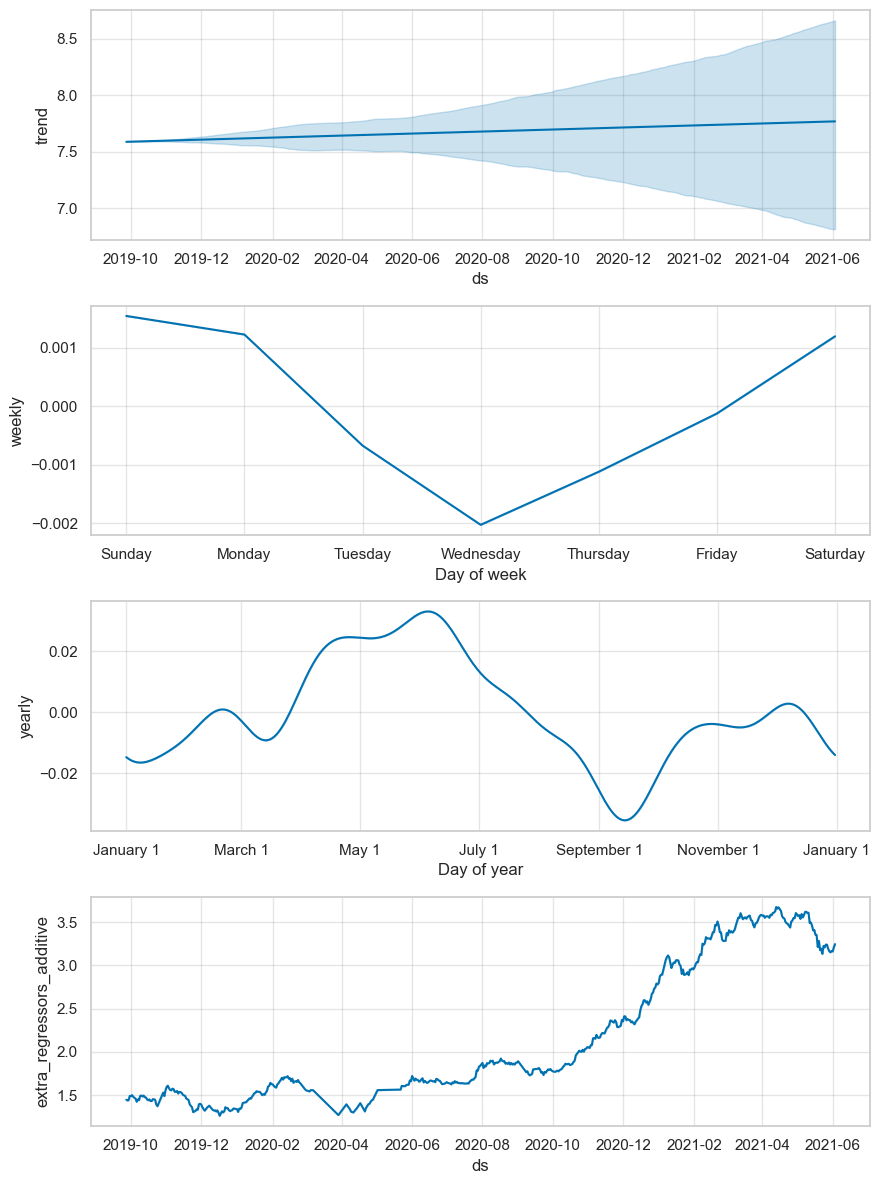

In [49]:
fig = prophet_model_b.plot_components(forecast_test)
plt.show()


### Model C: ARIMA

/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(0, 0, 0) RMSE: 1.5103057222748753
ARIMA(0, 0, 1) RMSE: 0.7723794974383853


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) RMSE: 0.4334592992205791


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 3) RMSE: 0.2843685454614761
ARIMA(0, 1, 0) RMSE: 0.13633201579913826


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(0, 1, 1) RMSE: 0.13632844556896923
ARIMA(0, 1, 2) RMSE: 0.13632807151700427


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(0, 1, 3) RMSE: 0.1363235714705229


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) RMSE: 0.06832072879852605


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) RMSE: 0.06831375095296785


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) RMSE: 0.06831286069226279


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) RMSE: 0.06830398757255118
ARIMA(1, 1, 0) RMSE: 0.1363283906784723


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(1, 1, 1) RMSE: 0.13632853516192156
ARIMA(1, 1, 2) RMSE: 0.13632843932966168


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(1, 1, 3) RMSE: 0.13632279699201705


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) RMSE: 0.06831363219789996


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) RMSE: 0.06831447789371663


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) RMSE: 0.06819373869297732


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 3) RMSE: 0.06829596185286799
ARIMA(2, 1, 0) RMSE: 0.1363281551091112


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(2, 1, 1) RMSE: 0.13632812677016803


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) RMSE: 0.13633161618393388


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 3) RMSE: 0.13630295739308235


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 0) RMSE: 0.06831314492783605


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) RMSE: 0.06831322856202629


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 2) RMSE: 0.06830699121798119


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 3) RMSE: 0.06826475273042819
ARIMA(3, 1, 0) RMSE: 0.13632288908862766


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

ARIMA(3, 1, 1) RMSE: 0.13632290564128668


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary

ARIMA(3, 1, 2) RMSE: 0.13630333445264167


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no

ARIMA(3, 1, 3) RMSE: 0.1362912798816309
Best ARIMA parameters: (2, 0, 2) with RMSE: 0.06819373869297732
Model C - Mean Absolute Error (MAE): 0.03
Model C - Root Mean Squared Error (RMSE): 0.07
Model C - R-Squared: 1.00
Model C - Mean Absolute Percentage Error (MAPE): 0.34%


/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


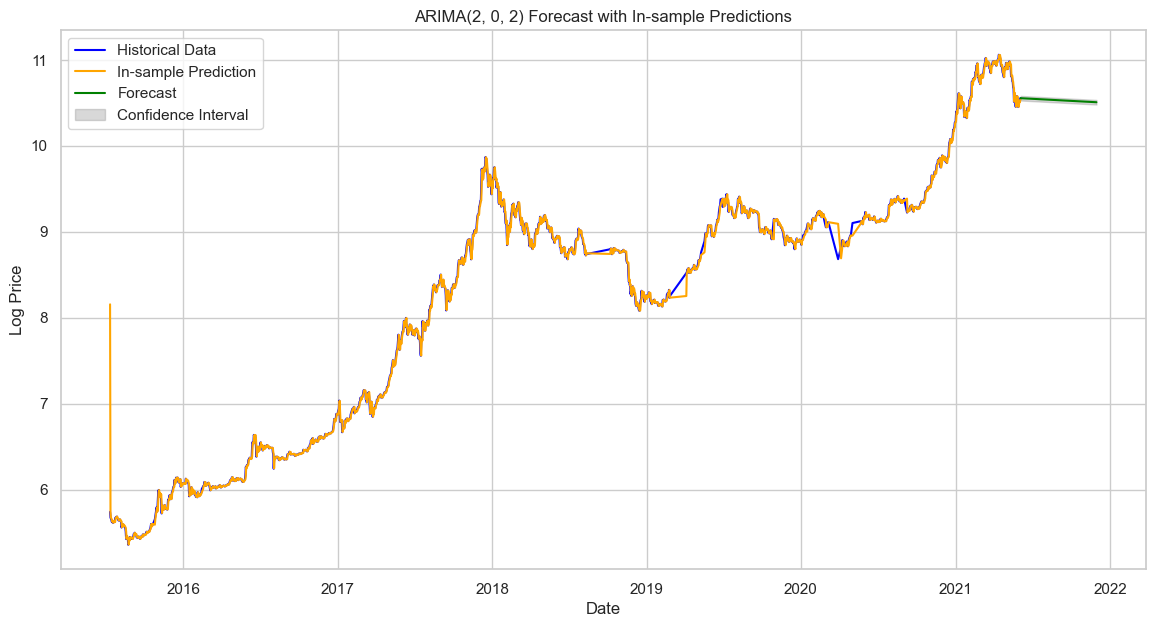

In [50]:
# Ensure your data is a proper time series
ts_data = df['log_price'].dropna()

# Define the range of p, d, q to try
import itertools
p = range(0, 4)  # Autoregressive part
q = range(0, 4)  # Moving average part
d = range(0, 2)  # Differencing part

# Create combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Initialize variables to store the best configuration
best_score, best_pdq = float("inf"), None

# Iterate over all combinations to find the best one
for pdq in pdq_combinations:
    try:
        model = ARIMA(ts_data, order=pdq)
        model_fit = model.fit()
        rmse = np.sqrt(mean_squared_error(ts_data, model_fit.fittedvalues))
        print(f'ARIMA{pdq} RMSE: {rmse}')

        if rmse < best_score:
            best_score, best_pdq = rmse, pdq
    except Exception as e:
        continue

print(f'Best ARIMA parameters: {best_pdq} with RMSE: {best_score}')

# Fit the ARIMA model with the best parameters
best_model = ARIMA(ts_data, order=best_pdq)
best_model_fit = best_model.fit()

# In-sample predictions
in_sample_pred = best_model_fit.fittedvalues

# Calculate MAE, RMSE, R-Squared, and MAPE
mae_c = mean_absolute_error(ts_data, in_sample_pred)
rmse_c = np.sqrt(mean_squared_error(ts_data, in_sample_pred))
r_squared_c = r2_score(ts_data, in_sample_pred)

# MAPE calculation (excluding zero values to prevent division by zero)
non_zero_mask = ts_data != 0
mape_c = np.mean(np.abs((ts_data[non_zero_mask] - in_sample_pred[non_zero_mask]) / ts_data[non_zero_mask])) * 100

# Print evaluation metrics for Model C
print(f'Model C - Mean Absolute Error (MAE): {mae_c:.2f}')
print(f'Model C - Root Mean Squared Error (RMSE): {rmse_c:.2f}')
print(f'Model C - R-Squared: {r_squared_c:.2f}')
print(f'Model C - Mean Absolute Percentage Error (MAPE): {mape_c:.2f}%')

# Forecast future values
n_forecast = 180  # Number of days to forecast
forecast = best_model_fit.forecast(steps=n_forecast)

# Plot the forecast including in-sample predictions
plt.figure(figsize=(14, 7))
plt.plot(ts_data.index, ts_data, label='Historical Data', color='blue', linewidth=1.5)
plt.plot(in_sample_pred.index, in_sample_pred, label='In-sample Prediction', color='orange', linewidth=1.5)
plt.plot(pd.date_range(ts_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast), forecast, label='Forecast', color='green', linewidth=1.5)
plt.fill_between(pd.date_range(ts_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast),
                 forecast - 1.96 * forecast.std(), forecast + 1.96 * forecast.std(),
                 color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.title(f'ARIMA{best_pdq} Forecast with In-sample Predictions')
plt.legend()
plt.grid(True)
plt.show()


# Part 2: Incorporating Numerical and Text Features

## 1 Developing TF-IDF for Text Features

In [51]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nglongvu1002/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### a. Clean and preprocess the text data, including tokenization, stop-word removal, and stemming

In [52]:
# Improved function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming and lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    # Join tokens back to string
    return ' '.join(tokens)

# List of all text-related columns (adjust if needed)
text_columns = [f'top_{i}' for i in range(35)] 

# Combine all text-related columns into a single column for text analysis
df['combined_text'] = df[text_columns].fillna('').agg(' '.join, axis=1)


### b. Implement the TF-IDF (Term Frequency-Inverse Document Frequency) technique to transform text into numerical features

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nglongvu1002/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nglongvu1002/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


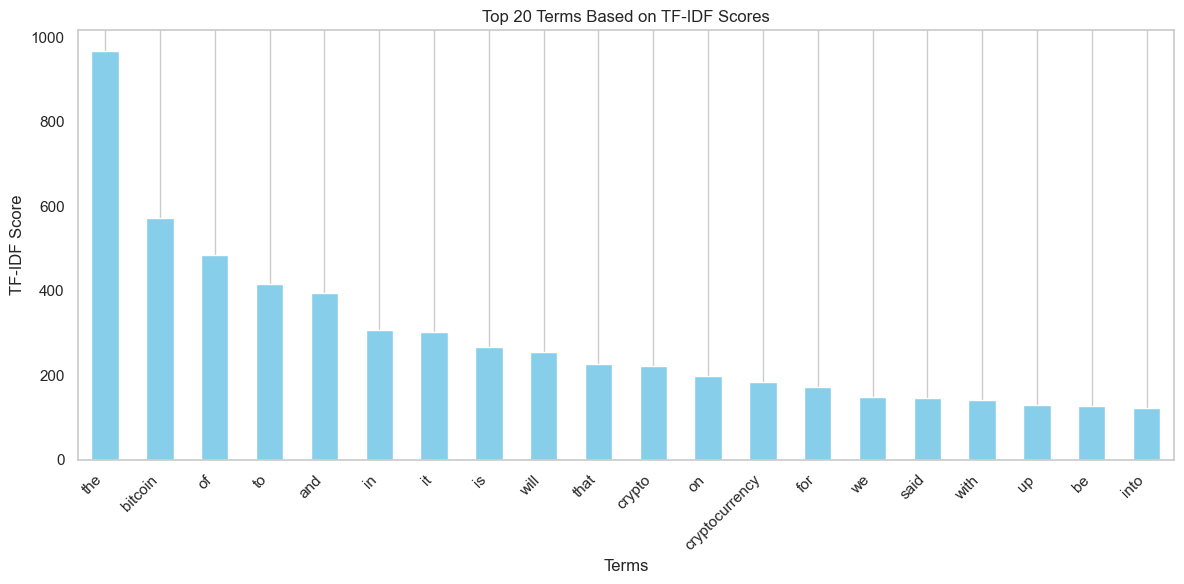

In [53]:
# Apply the preprocessing function to the combined text column
import nltk

# Download necessary resources
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Define the preprocess_text function (example with lemmatization)
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    # Tokenize the text (example)
    tokens = text.split()
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply the preprocessing function to the combined text column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# Implement TF-IDF on the processed text
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the top terms based on TF-IDF scores
top_terms = tfidf_df.sum(axis=0).sort_values(ascending=False).head(20)

# Plotting the top 20 TF-IDF terms
plt.figure(figsize=(12, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top 20 Terms Based on TF-IDF Scores')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


1. High TF-IDF Scores for Terms like "bitcoin," "crypto," and "cryptocurrency": These terms are the most prominent, as expected, since they are directly related to the overall topic. Their high frequency indicates that they are central to the context of the discussions over time.
2. Terms like "market," "said," and "nft" with Moderate Scores: Terms such as "market" and "nft" have considerable scores, suggesting a significant part of the discussion is about market activities and NFTs, indicating potential relevance to the general perception or activities in the cryptocurrency domain. The term "said" might be common in news articles discussing opinions or statements made by significant figures, which can impact market behavior.
3. Terms Indicative of Sentiment or Specific Events: Words like "order," "like," "think," "usd," and "platform" also have a noticeable TF-IDF score. These might indicate topics around the regulation, discussions, or opinions about cryptocurrency platforms, which could influence Bitcoin’s market dynamics.
4. Presence of Platform-Specific Terms like "coinbase": Presence of Platform-Specific Terms like "coinbase":




### c. Analyze the TF-IDF results to identify the most significant terms related to Bitcoin price movements

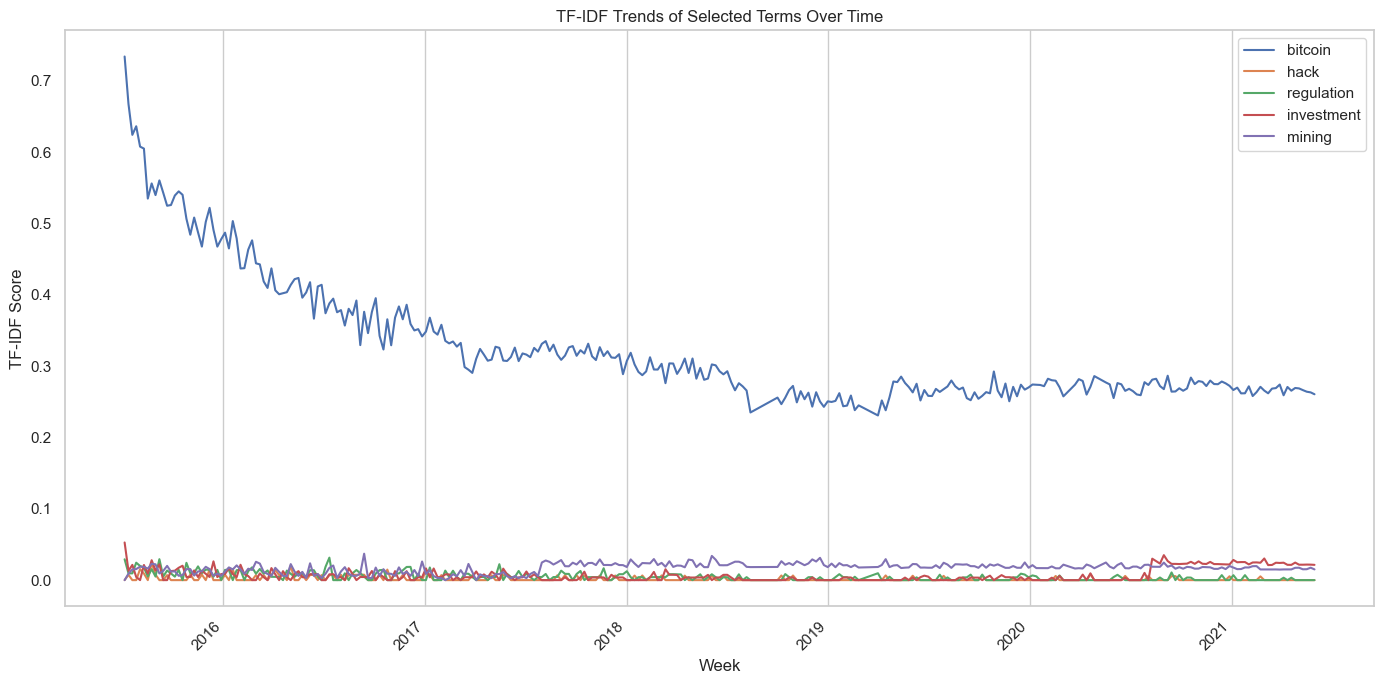

In [54]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by week (or choose another time period, e.g., 'M' for month)
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_text = df.groupby('week')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()

# Apply TF-IDF on the weekly aggregated text
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
tfidf_matrix = vectorizer.fit_transform(weekly_text['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['week'] = weekly_text['week']

# Set the week as the index for easier plotting
tfidf_df.set_index('week', inplace=True)

# Choose a few terms to visualize their trends over time
terms_to_plot = ['bitcoin', 'hack', 'regulation', 'investment', 'mining']  # Adjust terms as needed

# Plot the trends of selected terms
plt.figure(figsize=(14, 7))
for term in terms_to_plot:
    if term in tfidf_df.columns:
        plt.plot(tfidf_df.index, tfidf_df[term], label=term)

plt.title('TF-IDF Trends of Selected Terms Over Time')
plt.xlabel('Week')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



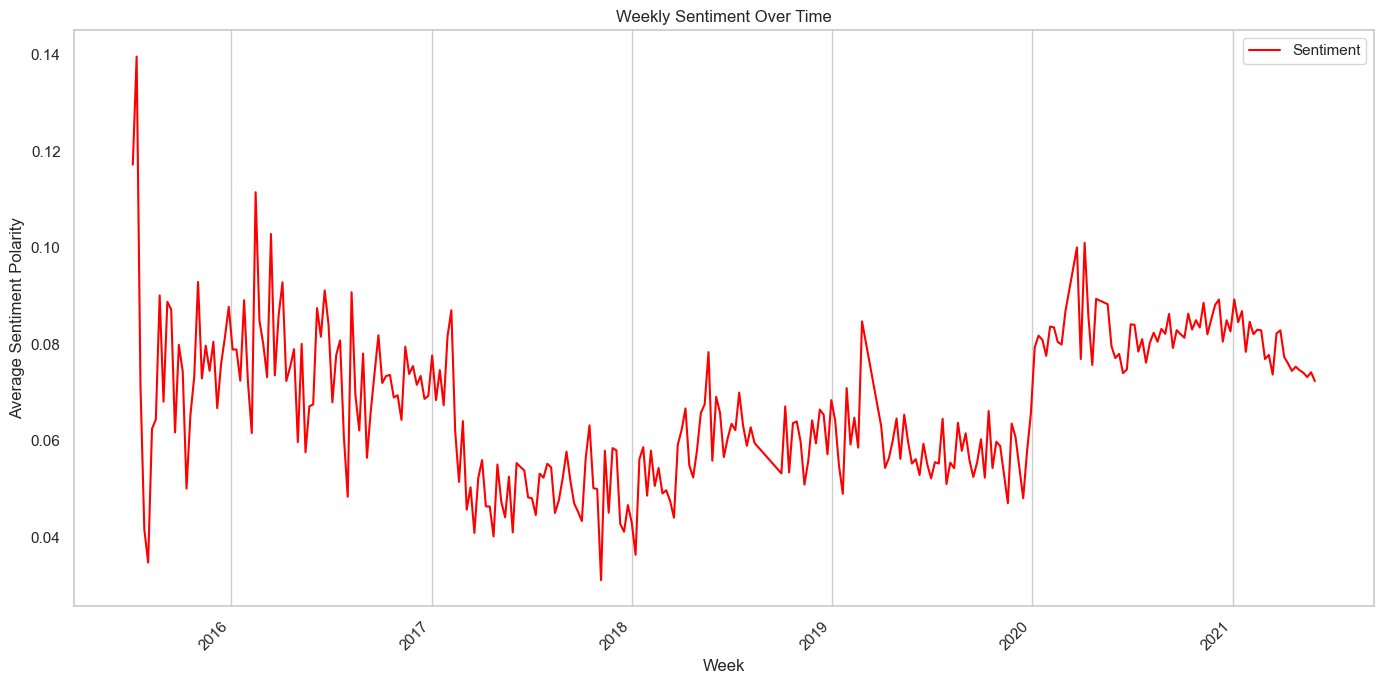

In [55]:
# Sentiment analysis using TextBlob
df['sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
weekly_sentiment = df.groupby('week')['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(14, 7))
plt.plot(weekly_sentiment['week'], weekly_sentiment['sentiment'], color='red', label='Sentiment')
plt.title('Weekly Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

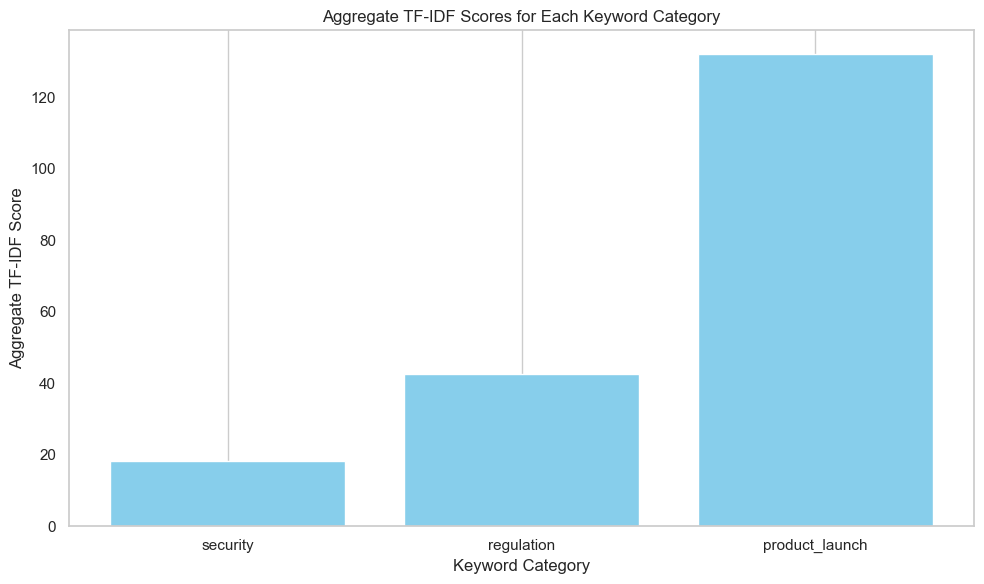

Category: security, Aggregate TF-IDF Score: 18.24
Category: regulation, Aggregate TF-IDF Score: 42.42
Category: product_launch, Aggregate TF-IDF Score: 132.14


In [56]:
documents = df['processed_text'].tolist()

# Step 1: Calculate TF-IDF Matrix
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 2: Aggregate Scores for Each Keyword Category
keywords = {
    'security': ['hack', 'breach', 'cyberattack', 'security'],
    'regulation': ['regulation', 'law', 'legislation', 'government'],
    'product_launch': ['launch', 'release', 'introduced', 'new']
}

# Initialize a dictionary to hold the scores for each category
category_scores = {category: 0 for category in keywords.keys()}

# Calculate the aggregate TF-IDF score for each category
for category, terms in keywords.items():
    for term in terms:
        if term in tfidf_df.columns:
            category_scores[category] += tfidf_df[term].sum()

# Step 3: Visualize the Results
plt.figure(figsize=(10, 6))
plt.bar(category_scores.keys(), category_scores.values(), color='skyblue')
plt.title('Aggregate TF-IDF Scores for Each Keyword Category')
plt.xlabel('Keyword Category')
plt.ylabel('Aggregate TF-IDF Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 4: Detailed Analysis (Optional)
# Print out detailed TF-IDF scores for each category
for category, score in category_scores.items():
    print(f"Category: {category}, Aggregate TF-IDF Score: {score:.2f}")

## 2. Integrating TF-IDF into the Best Model from Part 1

In [57]:
#Combine all text columns into a single column for analysis
df['combined_text'] = df[[f'top_{i}' for i in range(35)]].fillna('').agg(' '.join, axis=1)

# Preprocess text (assuming you've already defined a preprocess function)
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')  # Adjust max_features as needed
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

# Select the top 50 TF-IDF features using SelectKBest
selector = SelectKBest(score_func=mutual_info_regression, k=50)
tfidf_selected = selector.fit_transform(tfidf_df, df['log_price'])
tfidf_selected = pd.DataFrame(tfidf_selected, columns=selector.get_feature_names_out(), index=df.index)

# Check for NaNs in selected TF-IDF features and fill with 0
tfidf_selected.fillna(0, inplace=True)

print("TF-IDF transformation complete and features selected.")




TF-IDF transformation complete and features selected.


### 

/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood 

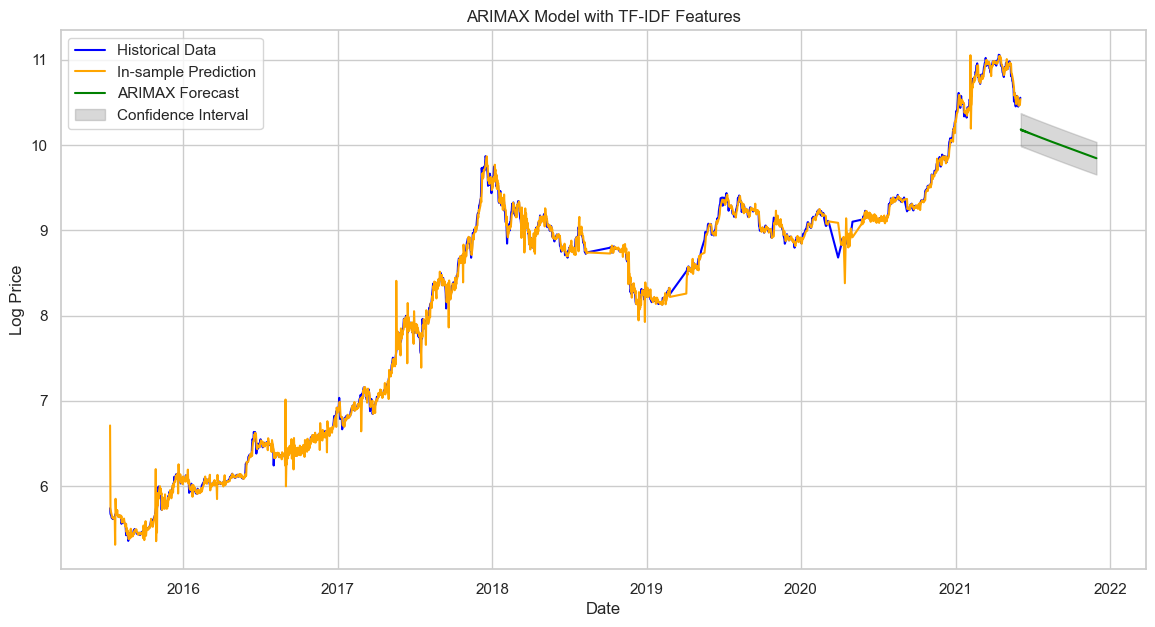

Model with TF-IDF (ARIMAX) - Mean Absolute Error (MAE): 0.04
Model with TF-IDF (ARIMAX) - Root Mean Squared Error (RMSE): 0.08
Model with TF-IDF (ARIMAX) - R-Squared: 1.00
Model with TF-IDF (ARIMAX) - Mean Absolute Percentage Error (MAPE): 0.56%


In [58]:
# Ensure 'log_price' and TF-IDF features are aligned
ts_data = df['log_price'].dropna()
exog_data = tfidf_selected.loc[ts_data.index]

# Define the best ARIMA parameters obtained earlier
best_pdq = (2, 0, 2)  # Adjust based on previous results

# Fit the ARIMAX model with the exogenous variables
arimax_model = ARIMA(ts_data, order=best_pdq, exog=exog_data)
arimax_model_fit = arimax_model.fit()

# In-sample predictions
in_sample_pred = arimax_model_fit.predict(start=ts_data.index[0], end=ts_data.index[-1], exog=exog_data)

# Forecast future values (with correct date alignment)
n_forecast = 180
future_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')

# Generate future exogenous variables as zeros or extrapolate them
future_exog = pd.DataFrame(0, index=future_dates, columns=exog_data.columns)

# Make forecast with ARIMAX model
arimax_forecast = arimax_model_fit.forecast(steps=n_forecast, exog=future_exog)

# Plotting
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(ts_data.index, ts_data, label='Historical Data', color='blue', linewidth=1.5)

# Plot in-sample predictions
plt.plot(in_sample_pred.index, in_sample_pred, label='In-sample Prediction', color='orange', linewidth=1.5)

# Plot forecast
plt.plot(future_dates, arimax_forecast, label='ARIMAX Forecast', color='green', linewidth=1.5)

# Add confidence interval (±1.96 standard errors)
forecast_std = arimax_forecast.std()
plt.fill_between(future_dates, arimax_forecast - 1.96 * forecast_std, arimax_forecast + 1.96 * forecast_std, color='gray', alpha=0.3, label='Confidence Interval')

# Final plot adjustments
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.title('ARIMAX Model with TF-IDF Features')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance on in-sample data
mae = mean_absolute_error(ts_data, in_sample_pred)
rmse = np.sqrt(mean_squared_error(ts_data, in_sample_pred))
r2 = r2_score(ts_data, in_sample_pred)

# MAPE calculation (excluding zero values)
non_zero_mask = ts_data != 0
mape = np.mean(np.abs((ts_data[non_zero_mask] - in_sample_pred[non_zero_mask]) / ts_data[non_zero_mask])) * 100

# Print evaluation metrics
print(f'Model with TF-IDF (ARIMAX) - Mean Absolute Error (MAE): {mae:.2f}')
print(f'Model with TF-IDF (ARIMAX) - Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Model with TF-IDF (ARIMAX) - R-Squared: {r2:.2f}')
print(f'Model with TF-IDF (ARIMAX) - Mean Absolute Percentage Error (MAPE): {mape:.2f}%')



/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nglongvu1002/.conda/envs/pythonProject/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported inde

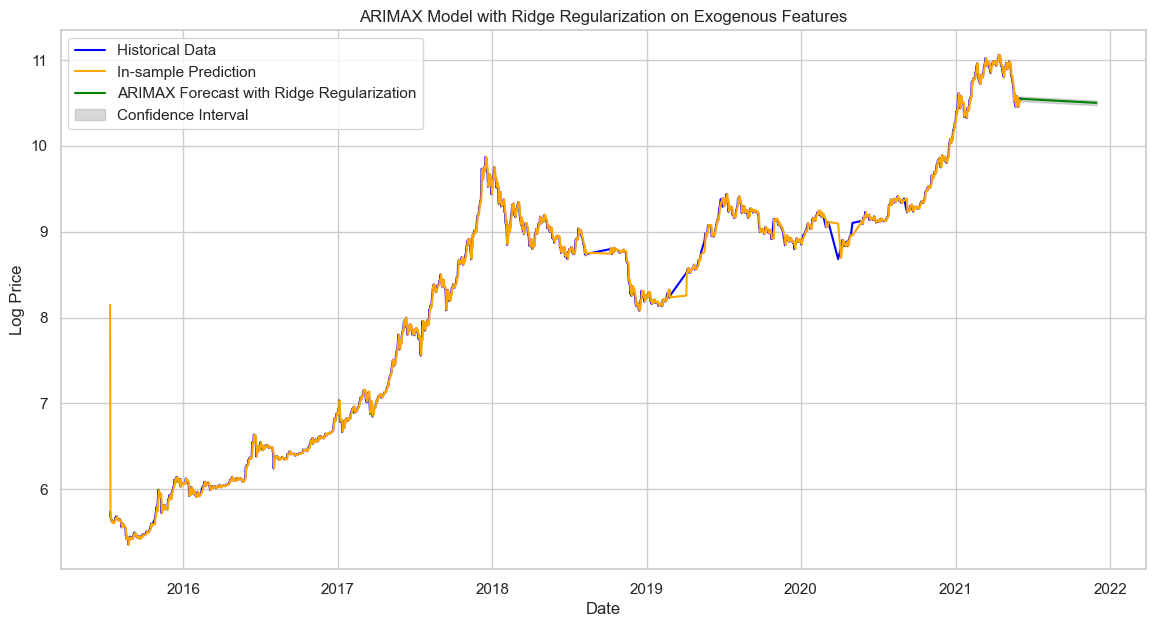

Model with TF-IDF (ARIMAX with Ridge) - Mean Absolute Error (MAE): 0.03
Model with TF-IDF (ARIMAX with Ridge) - Root Mean Squared Error (RMSE): 0.07
Model with TF-IDF (ARIMAX with Ridge) - R-Squared: 1.00
Model with TF-IDF (ARIMAX with Ridge) - Mean Absolute Percentage Error (MAPE): 0.34%


In [61]:
# Ensure 'log_price' and TF-IDF features are aligned
ts_data = df['log_price'].dropna()
exog_data = tfidf_selected.loc[ts_data.index]

# Define the best ARIMA parameters obtained earlier
best_pdq = (2, 0, 2)  # Adjust based on previous results

# Fit the ARIMA model without exogenous variables
arima_model = ARIMA(ts_data, order=best_pdq)
arima_model_fit = arima_model.fit()

# Obtain ARIMA residuals to fit the exogenous component
arima_residuals = ts_data - arima_model_fit.fittedvalues

# Fit a Ridge regression on the residuals with exogenous variables
ridge = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
ridge.fit(exog_data, arima_residuals)

# In-sample predictions: ARIMA predictions + Ridge model predictions
arima_pred = arima_model_fit.fittedvalues
ridge_pred = ridge.predict(exog_data)
in_sample_pred = arima_pred + ridge_pred

# Forecast future values
n_forecast = 180
future_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')
future_exog = pd.DataFrame(0, index=future_dates, columns=exog_data.columns)  # Generate future exog variables as zeros
arima_forecast = arima_model_fit.forecast(steps=n_forecast)
ridge_forecast = ridge.predict(future_exog)
combined_forecast = arima_forecast + ridge_forecast

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(ts_data.index, ts_data, label='Historical Data', color='blue', linewidth=1.5)
plt.plot(in_sample_pred.index, in_sample_pred, label='In-sample Prediction', color='orange', linewidth=1.5)
plt.plot(future_dates, combined_forecast, label='ARIMAX Forecast with Ridge Regularization', color='green', linewidth=1.5)

# Add confidence interval (±1.96 standard errors)
forecast_std = arima_forecast.std()
plt.fill_between(future_dates, combined_forecast - 1.96 * forecast_std, combined_forecast + 1.96 * forecast_std, color='gray', alpha=0.3, label='Confidence Interval')

# Final plot adjustments
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.title('ARIMAX Model with Ridge Regularization on Exogenous Features')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance on in-sample data
mae = mean_absolute_error(ts_data, in_sample_pred)
rmse = np.sqrt(mean_squared_error(ts_data, in_sample_pred))
r2 = r2_score(ts_data, in_sample_pred)

# MAPE calculation (excluding zero values)
non_zero_mask = ts_data != 0
mape = np.mean(np.abs((ts_data[non_zero_mask] - in_sample_pred[non_zero_mask]) / ts_data[non_zero_mask])) * 100

# Print evaluation metrics
print(f'Model with TF-IDF (ARIMAX with Ridge) - Mean Absolute Error (MAE): {mae:.2f}')
print(f'Model with TF-IDF (ARIMAX with Ridge) - Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Model with TF-IDF (ARIMAX with Ridge) - R-Squared: {r2:.2f}')
print(f'Model with TF-IDF (ARIMAX with Ridge) - Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
